In [1]:
import numpy as np 
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
import klib 
import dtale
import statsmodels as st
import scipy.stats as sc
import yfinance as yf
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 

C:\Users\10\anaconda3\Lib\site-packages\kaleido\_sync_server.py:11: UserWarning:




This means that static image generation (e.g. `fig.write_image()`) will not work.

Please upgrade Plotly to version 6.1.1 or greater, or downgrade Kaleido to version 0.2.1.




In [2]:
btc= yf.Ticker('BTC-USD')
prices1= btc.history(period='5y')

In [3]:
prices1

Open          High           Low  \
Date                                                                  
2020-11-19 00:00:00+00:00  17803.861328  18119.546875  17382.554688   
2020-11-20 00:00:00+00:00  17817.083984  18773.226562  17765.794922   
2020-11-21 00:00:00+00:00  18621.316406  18936.621094  18444.359375   
2020-11-22 00:00:00+00:00  18642.232422  18688.968750  17671.384766   
2020-11-23 00:00:00+00:00  18370.017578  18711.425781  18000.796875   
...                                 ...           ...           ...   
2025-11-14 00:00:00+00:00  99694.703125  99804.429688  94000.734375   
2025-11-15 00:00:00+00:00  94420.468750  96728.468750  94420.468750   
2025-11-16 00:00:00+00:00  95556.867188  96564.187500  92971.164062   
2025-11-17 00:00:00+00:00  94180.875000  95928.367188  91214.757812   
2025-11-18 00:00:00+00:00  92094.531250  93745.078125  89300.460938   

                                  Close        Volume  Dividends  Stock Splits  
Date                                                                            
2020-11-19 00:00:00+00:00  17817.089844   36985055355        0.0           0.0  
2020-11-20 00:00:00+00:00  18621.314453   36992873940        0.0           0.0  
2020-11-21 00:00:00+00:00  18642.232422   39650210707        0.0           0.0  
2020-11-22 00:00:00+00:00  18370.001953   41280434226        0.0           0.0  
2020-11-23 00:00:00+00:00  18364.121094   42741112308        0.0           0.0  
...                                 ...           ...        ...           ...  
2025-11-14 00:00:00+00:00  94397.789062  114346441890        0.0           0.0  
2025-11-15 00:00:00+00:00  95549.148438   38500716654        0.0           0.0  
2025-11-16 00:00:00+00:00  94177.078125   71086235862        0.0           0.0  
2025-11-17 00:00:00+00:00  92093.875000   94186165724        0.0           0.0  
2025-11-18 00:00:00+00:00  92948.875000  101333569062        0.0           0.0  

[1826 rows x 7 columns]

In [4]:
prices1.drop(columns=['Open', 'High','Low','Dividends','Stock Splits'], axis=1)

Close        Volume
Date                                                 
2020-11-19 00:00:00+00:00  17817.089844   36985055355
2020-11-20 00:00:00+00:00  18621.314453   36992873940
2020-11-21 00:00:00+00:00  18642.232422   39650210707
2020-11-22 00:00:00+00:00  18370.001953   41280434226
2020-11-23 00:00:00+00:00  18364.121094   42741112308
...                                 ...           ...
2025-11-14 00:00:00+00:00  94397.789062  114346441890
2025-11-15 00:00:00+00:00  95549.148438   38500716654
2025-11-16 00:00:00+00:00  94177.078125   71086235862
2025-11-17 00:00:00+00:00  92093.875000   94186165724
2025-11-18 00:00:00+00:00  92948.875000  101333569062

[1826 rows x 2 columns]

In [5]:
prices1.head()

Open          High           Low  \
Date                                                                  
2020-11-19 00:00:00+00:00  17803.861328  18119.546875  17382.554688   
2020-11-20 00:00:00+00:00  17817.083984  18773.226562  17765.794922   
2020-11-21 00:00:00+00:00  18621.316406  18936.621094  18444.359375   
2020-11-22 00:00:00+00:00  18642.232422  18688.968750  17671.384766   
2020-11-23 00:00:00+00:00  18370.017578  18711.425781  18000.796875   

                                  Close       Volume  Dividends  Stock Splits  
Date                                                                           
2020-11-19 00:00:00+00:00  17817.089844  36985055355        0.0           0.0  
2020-11-20 00:00:00+00:00  18621.314453  36992873940        0.0           0.0  
2020-11-21 00:00:00+00:00  18642.232422  39650210707        0.0           0.0  
2020-11-22 00:00:00+00:00  18370.001953  41280434226        0.0           0.0  
2020-11-23 00:00:00+00:00  18364.121094  42741112308        0.0           0.0

In [6]:
prices1.drop(columns=['Open','High','Low','Dividends','Stock Splits'], axis=1, inplace=True)

In [7]:
prices1.head()

Close       Volume
Date                                                
2020-11-19 00:00:00+00:00  17817.089844  36985055355
2020-11-20 00:00:00+00:00  18621.314453  36992873940
2020-11-21 00:00:00+00:00  18642.232422  39650210707
2020-11-22 00:00:00+00:00  18370.001953  41280434226
2020-11-23 00:00:00+00:00  18364.121094  42741112308

In [8]:
eth= yf.Ticker('ETH-USD')
prices2= eth.history(period='5y')
prices2= prices2.drop(columns=['Open','High','Low','Dividends','Stock Splits'], axis=1)

In [9]:
prices2

Close       Volume
Date                                               
2020-11-19 00:00:00+00:00   471.630432  12473929218
2020-11-20 00:00:00+00:00   509.744568  18629943296
2020-11-21 00:00:00+00:00   549.486633  20757099184
2020-11-22 00:00:00+00:00   558.068115  21967049601
2020-11-23 00:00:00+00:00   608.454041  27272302872
...                                ...          ...
2025-11-14 00:00:00+00:00  3103.785645  47003809463
2025-11-15 00:00:00+00:00  3166.631348  19932940649
2025-11-16 00:00:00+00:00  3092.847412  30987886524
2025-11-17 00:00:00+00:00  3024.538818  41026793235
2025-11-18 00:00:00+00:00  3122.979004  41581494270

[1826 rows x 2 columns]

In [10]:
usdt= yf.Ticker('USDT-USd')
prices3=usdt.history(period='5y')
prices3.drop(columns=['Open','High','Low','Dividends','Stock Splits'], axis=1, inplace=True)

In [11]:
prices3

Close        Volume
Date                                             
2020-11-19 00:00:00+00:00  1.000781   53334422091
2020-11-20 00:00:00+00:00  1.000427   58285960281
2020-11-21 00:00:00+00:00  0.998874   77062206041
2020-11-22 00:00:00+00:00  0.999203   80187383235
2020-11-23 00:00:00+00:00  1.000092   85808045491
...                             ...           ...
2025-11-14 00:00:00+00:00  0.999129  179708124711
2025-11-15 00:00:00+00:00  0.999531   87346757339
2025-11-16 00:00:00+00:00  0.999262  119937340292
2025-11-17 00:00:00+00:00  0.998895  158466587927
2025-11-18 00:00:00+00:00  0.999525  156914958706

[1826 rows x 2 columns]

In [12]:
bnb= yf.Ticker('BNB-USD')
prices4= bnb.history(period='5y')
prices4= prices4.drop(columns=['Open','High','Low','Dividends','Stock Splits'], axis=1)

In [13]:
prices4.tail()

Close      Volume
Date                                             
2025-11-14 00:00:00+00:00  915.309265  3778463496
2025-11-15 00:00:00+00:00  932.201904  1963778260
2025-11-16 00:00:00+00:00  927.257874  2497118342
2025-11-17 00:00:00+00:00  906.482422  3757441490
2025-11-18 00:00:00+00:00  932.482361  3623344375

In [14]:
p1= prices1.join(prices2, lsuffix='(BTC)', rsuffix='(ETH)')
p2=prices3.join(prices4, lsuffix='(USDT)', rsuffix='(BNB)')

In [15]:
p1

Close(BTC)   Volume(BTC)   Close(ETH)  \
Date                                                                 
2020-11-19 00:00:00+00:00  17817.089844   36985055355   471.630432   
2020-11-20 00:00:00+00:00  18621.314453   36992873940   509.744568   
2020-11-21 00:00:00+00:00  18642.232422   39650210707   549.486633   
2020-11-22 00:00:00+00:00  18370.001953   41280434226   558.068115   
2020-11-23 00:00:00+00:00  18364.121094   42741112308   608.454041   
...                                 ...           ...          ...   
2025-11-14 00:00:00+00:00  94397.789062  114346441890  3103.785645   
2025-11-15 00:00:00+00:00  95549.148438   38500716654  3166.631348   
2025-11-16 00:00:00+00:00  94177.078125   71086235862  3092.847412   
2025-11-17 00:00:00+00:00  92093.875000   94186165724  3024.538818   
2025-11-18 00:00:00+00:00  92948.875000  101333569062  3122.979004   

                           Volume(ETH)  
Date                                    
2020-11-19 00:00:00+00:00  12473929218  
2020-11-20 00:00:00+00:00  18629943296  
2020-11-21 00:00:00+00:00  20757099184  
2020-11-22 00:00:00+00:00  21967049601  
2020-11-23 00:00:00+00:00  27272302872  
...                                ...  
2025-11-14 00:00:00+00:00  47003809463  
2025-11-15 00:00:00+00:00  19932940649  
2025-11-16 00:00:00+00:00  30987886524  
2025-11-17 00:00:00+00:00  41026793235  
2025-11-18 00:00:00+00:00  41581494270  

[1826 rows x 4 columns]

In [16]:
p2

Close(USDT)  Volume(USDT)  Close(BNB)  Volume(BNB)
Date                                                                         
2020-11-19 00:00:00+00:00     1.000781   53334422091   28.094105    282317319
2020-11-20 00:00:00+00:00     1.000427   58285960281   28.891996    321436881
2020-11-21 00:00:00+00:00     0.998874   77062206041   30.391291    419204706
2020-11-22 00:00:00+00:00     0.999203   80187383235   29.925072    426289161
2020-11-23 00:00:00+00:00     1.000092   85808045491   30.965368    433686948
...                                ...           ...         ...          ...
2025-11-14 00:00:00+00:00     0.999129  179708124711  915.309265   3778463496
2025-11-15 00:00:00+00:00     0.999531   87346757339  932.201904   1963778260
2025-11-16 00:00:00+00:00     0.999262  119937340292  927.257874   2497118342
2025-11-17 00:00:00+00:00     0.998895  158466587927  906.482422   3757441490
2025-11-18 00:00:00+00:00     0.999525  156914958706  932.482361   3623344375

[1826 rows x 4 columns]

In [17]:
data= p1.join(p2, lsuffix='_' , rsuffix='_')

In [18]:
data

Close(BTC)   Volume(BTC)   Close(ETH)  \
Date                                                                 
2020-11-19 00:00:00+00:00  17817.089844   36985055355   471.630432   
2020-11-20 00:00:00+00:00  18621.314453   36992873940   509.744568   
2020-11-21 00:00:00+00:00  18642.232422   39650210707   549.486633   
2020-11-22 00:00:00+00:00  18370.001953   41280434226   558.068115   
2020-11-23 00:00:00+00:00  18364.121094   42741112308   608.454041   
...                                 ...           ...          ...   
2025-11-14 00:00:00+00:00  94397.789062  114346441890  3103.785645   
2025-11-15 00:00:00+00:00  95549.148438   38500716654  3166.631348   
2025-11-16 00:00:00+00:00  94177.078125   71086235862  3092.847412   
2025-11-17 00:00:00+00:00  92093.875000   94186165724  3024.538818   
2025-11-18 00:00:00+00:00  92948.875000  101333569062  3122.979004   

                           Volume(ETH)  Close(USDT)  Volume(USDT)  Close(BNB)  \
Date                                                                            
2020-11-19 00:00:00+00:00  12473929218     1.000781   53334422091   28.094105   
2020-11-20 00:00:00+00:00  18629943296     1.000427   58285960281   28.891996   
2020-11-21 00:00:00+00:00  20757099184     0.998874   77062206041   30.391291   
2020-11-22 00:00:00+00:00  21967049601     0.999203   80187383235   29.925072   
2020-11-23 00:00:00+00:00  27272302872     1.000092   85808045491   30.965368   
...                                ...          ...           ...         ...   
2025-11-14 00:00:00+00:00  47003809463     0.999129  179708124711  915.309265   
2025-11-15 00:00:00+00:00  19932940649     0.999531   87346757339  932.201904   
2025-11-16 00:00:00+00:00  30987886524     0.999262  119937340292  927.257874   
2025-11-17 00:00:00+00:00  41026793235     0.998895  158466587927  906.482422   
2025-11-18 00:00:00+00:00  41581494270     0.999525  156914958706  932.482361   

                           Volume(BNB)  
Date                                    
2020-11-19 00:00:00+00:00    282317319  
2020-11-20 00:00:00+00:00    321436881  
2020-11-21 00:00:00+00:00    419204706  
2020-11-22 00:00:00+00:00    426289161  
2020-11-23 00:00:00+00:00    433686948  
...                                ...  
2025-11-14 00:00:00+00:00   3778463496  
2025-11-15 00:00:00+00:00   1963778260  
2025-11-16 00:00:00+00:00   2497118342  
2025-11-17 00:00:00+00:00   3757441490  
2025-11-18 00:00:00+00:00   3623344375  

[1826 rows x 8 columns]

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1826 entries, 2020-11-19 00:00:00+00:00 to 2025-11-18 00:00:00+00:00
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Close(BTC)    1826 non-null   float64
 1   Volume(BTC)   1826 non-null   int64  
 2   Close(ETH)    1826 non-null   float64
 3   Volume(ETH)   1826 non-null   int64  
 4   Close(USDT)   1826 non-null   float64
 5   Volume(USDT)  1826 non-null   int64  
 6   Close(BNB)    1826 non-null   float64
 7   Volume(BNB)   1826 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 128.4 KB


In [20]:
data.shape

(1826, 8)

In [21]:
data.isna()

Close(BTC)  Volume(BTC)  Close(ETH)  Volume(ETH)  \
Date                                                                          
2020-11-19 00:00:00+00:00       False        False       False        False   
2020-11-20 00:00:00+00:00       False        False       False        False   
2020-11-21 00:00:00+00:00       False        False       False        False   
2020-11-22 00:00:00+00:00       False        False       False        False   
2020-11-23 00:00:00+00:00       False        False       False        False   
...                               ...          ...         ...          ...   
2025-11-14 00:00:00+00:00       False        False       False        False   
2025-11-15 00:00:00+00:00       False        False       False        False   
2025-11-16 00:00:00+00:00       False        False       False        False   
2025-11-17 00:00:00+00:00       False        False       False        False   
2025-11-18 00:00:00+00:00       False        False       False        False   

                           Close(USDT)  Volume(USDT)  Close(BNB)  Volume(BNB)  
Date                                                                           
2020-11-19 00:00:00+00:00        False         False       False        False  
2020-11-20 00:00:00+00:00        False         False       False        False  
2020-11-21 00:00:00+00:00        False         False       False        False  
2020-11-22 00:00:00+00:00        False         False       False        False  
2020-11-23 00:00:00+00:00        False         False       False        False  
...                                ...           ...         ...          ...  
2025-11-14 00:00:00+00:00        False         False       False        False  
2025-11-15 00:00:00+00:00        False         False       False        False  
2025-11-16 00:00:00+00:00        False         False       False        False  
2025-11-17 00:00:00+00:00        False         False       False        False  
2025-11-18 00:00:00+00:00        False         False       False        False  

[1826 rows x 8 columns]

In [22]:
data.isna().sum()

Close(BTC)      0
Volume(BTC)     0
Close(ETH)      0
Volume(ETH)     0
Close(USDT)     0
Volume(USDT)    0
Close(BNB)      0
Volume(BNB)     0
dtype: int64

In [23]:
data.describe()

Close(BTC)   Volume(BTC)   Close(ETH)   Volume(ETH)  Close(USDT)  \
count    1826.000000  1.826000e+03  1826.000000  1.826000e+03  1826.000000   
mean    52827.213923  3.685928e+10  2478.493259  1.939519e+10     1.000158   
std     29396.871128  2.270333e+10   954.156147  1.288713e+10     0.000714   
min     15787.284180  5.331173e+09   471.630432  2.081626e+09     0.995872   
25%     28430.770508  2.142473e+10  1730.357941  1.025222e+10     0.999906   
50%     44140.568359  3.174865e+10  2369.006226  1.628698e+10     1.000147   
75%     67135.705078  4.633602e+10  3230.222412  2.449105e+10     1.000402   
max    124752.531250  3.509679e+11  4831.348633  9.773662e+10     1.011530   

       Volume(USDT)   Close(BNB)   Volume(BNB)  
count  1.826000e+03  1826.000000  1.826000e+03  
mean   7.037715e+10   437.264273  1.803444e+09  
std    4.476366e+10   220.539293  1.486611e+09  
min    9.989859e+09    27.361004  2.038465e+08  
25%    3.991790e+10   277.458923  8.081941e+08  
50%    6.008145e+10   382.541840  1.566364e+09  
75%    8.725219e+10   592.019730  2.166909e+09  
max    3.443980e+11  1310.214355  1.798295e+10

<Axes: xlabel='Date'>

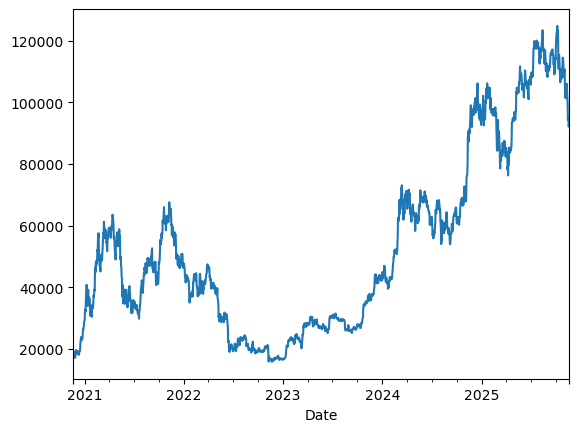

In [24]:
data['Close(BTC)'].plot()

<Axes: xlabel='Date'>

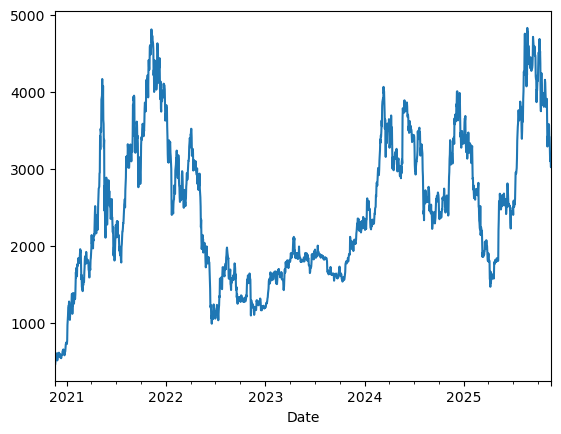

In [25]:
data['Close(ETH)'].plot()

<Axes: xlabel='Date'>

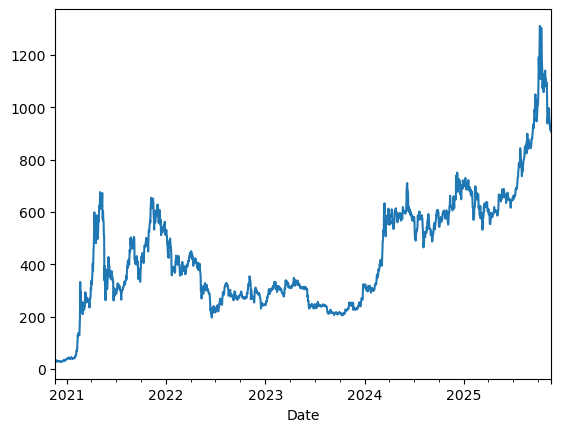

In [26]:
data['Close(BNB)'].plot()

<Axes: xlabel='Date'>

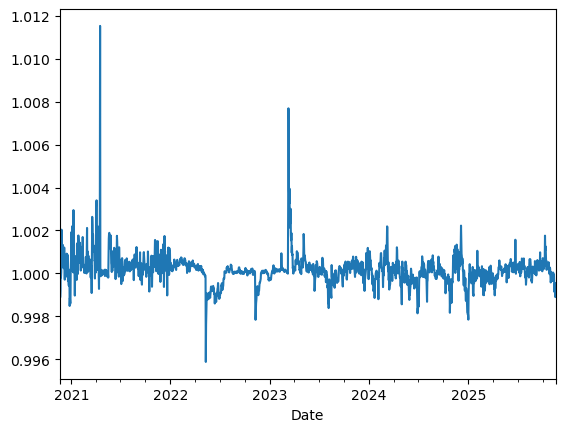

In [27]:
data['Close(USDT)'].plot()

<Axes: xlabel='Date'>

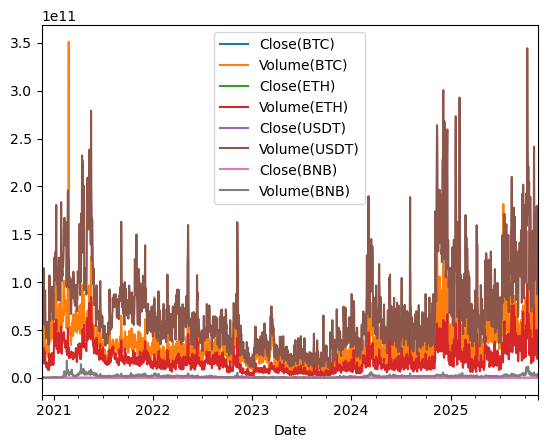

In [28]:
data.plot()

<Axes: xlabel='Date'>

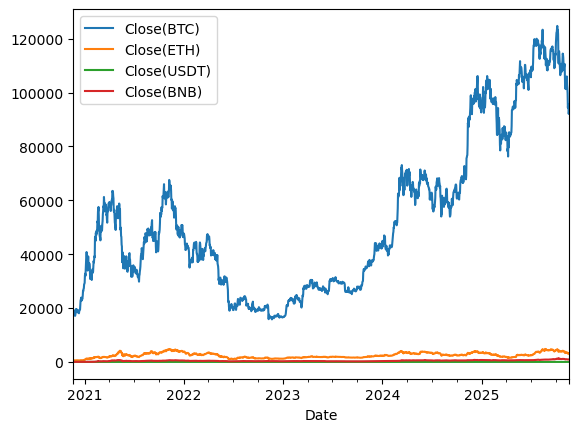

In [29]:
data[['Close(BTC)','Close(ETH)','Close(USDT)','Close(BNB)']].plot()

<Axes: xlabel='Date'>

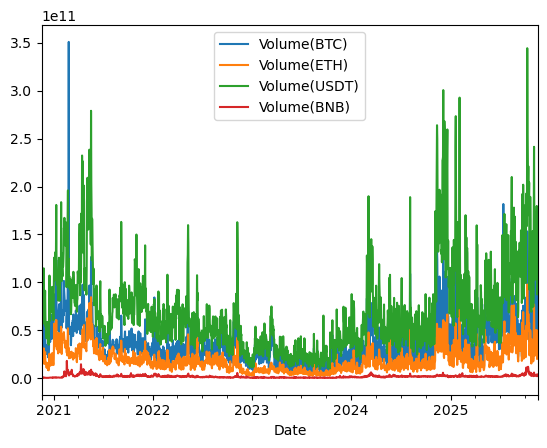

In [30]:
data[['Volume(BTC)','Volume(ETH)','Volume(USDT)','Volume(BNB)']].plot()

<Axes: title={'center': 'Feature-correlation (pearson)'}>

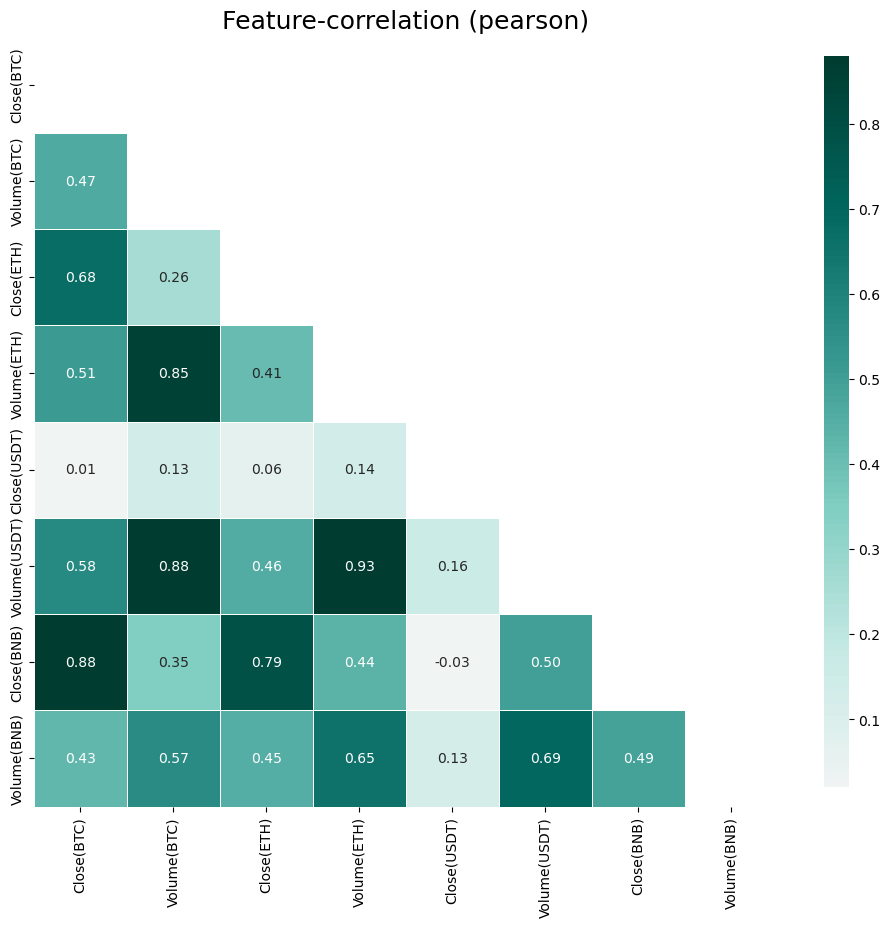

In [31]:
klib.corr_plot(data)

In [32]:
klib.corr_mat(p1)

C:\Users\10\anaconda3\Lib\site-packages\klib\describe.py:275: FutureWarning:

Styler.applymap has been deprecated. Use Styler.map instead.



In [33]:
klib.corr_mat(p2)

C:\Users\10\anaconda3\Lib\site-packages\klib\describe.py:275: FutureWarning:

Styler.applymap has been deprecated. Use Styler.map instead.



In [34]:
data.index

DatetimeIndex(['2020-11-19 00:00:00+00:00', '2020-11-20 00:00:00+00:00',
               '2020-11-21 00:00:00+00:00', '2020-11-22 00:00:00+00:00',
               '2020-11-23 00:00:00+00:00', '2020-11-24 00:00:00+00:00',
               '2020-11-25 00:00:00+00:00', '2020-11-26 00:00:00+00:00',
               '2020-11-27 00:00:00+00:00', '2020-11-28 00:00:00+00:00',
               ...
               '2025-11-09 00:00:00+00:00', '2025-11-10 00:00:00+00:00',
               '2025-11-11 00:00:00+00:00', '2025-11-12 00:00:00+00:00',
               '2025-11-13 00:00:00+00:00', '2025-11-14 00:00:00+00:00',
               '2025-11-15 00:00:00+00:00', '2025-11-16 00:00:00+00:00',
               '2025-11-17 00:00:00+00:00', '2025-11-18 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=1826, freq=None)

<Axes: xlabel='Volume(ETH)', ylabel='Density'>

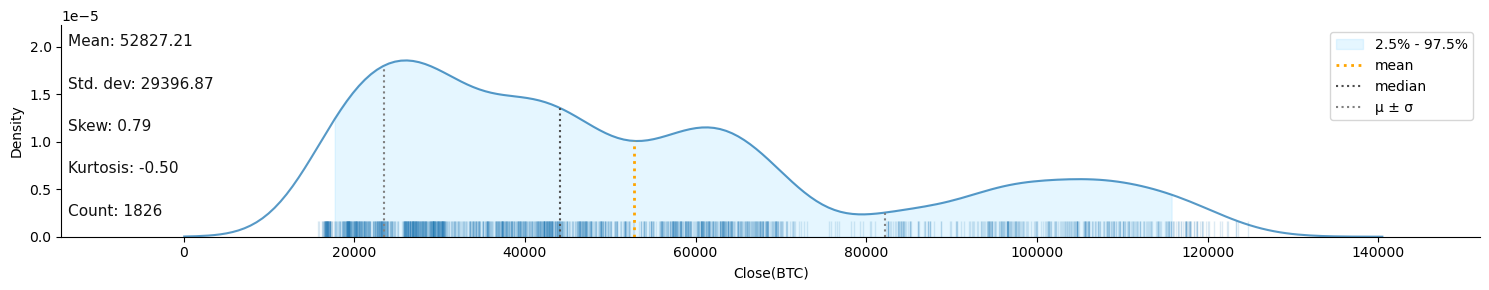

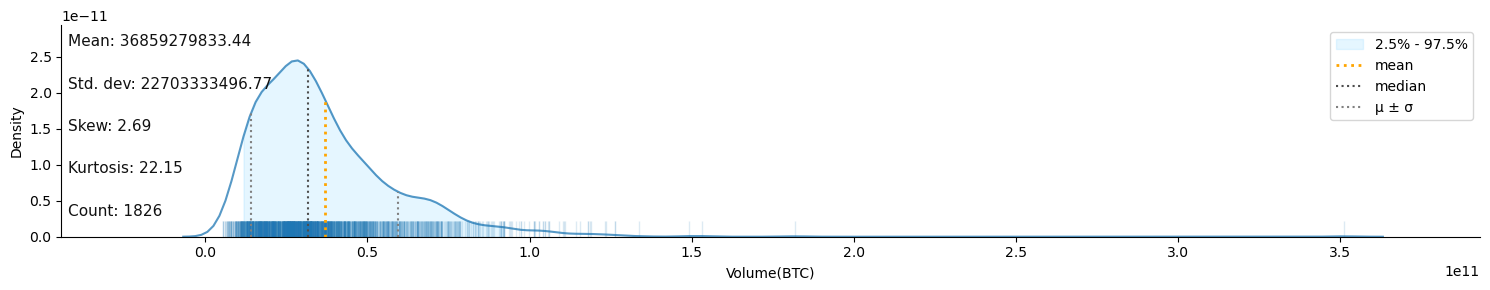

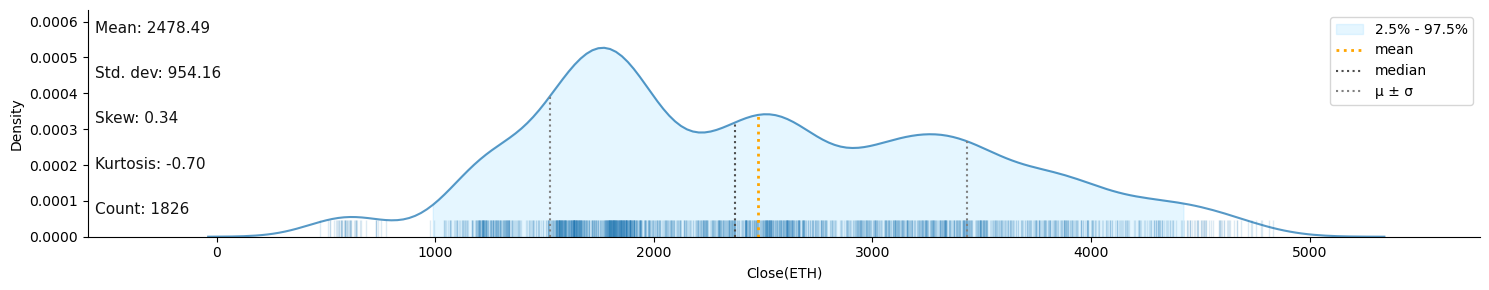

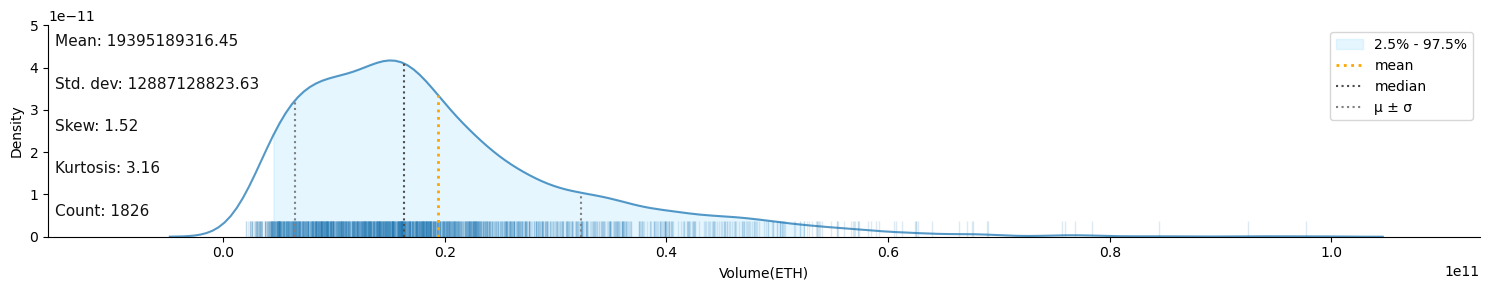

In [35]:
klib.dist_plot(p1)

<Axes: xlabel='Volume(BNB)', ylabel='Density'>

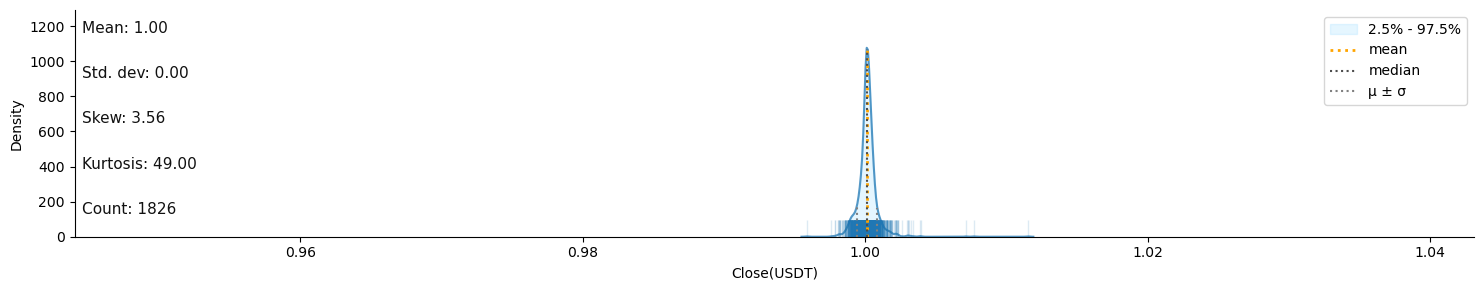

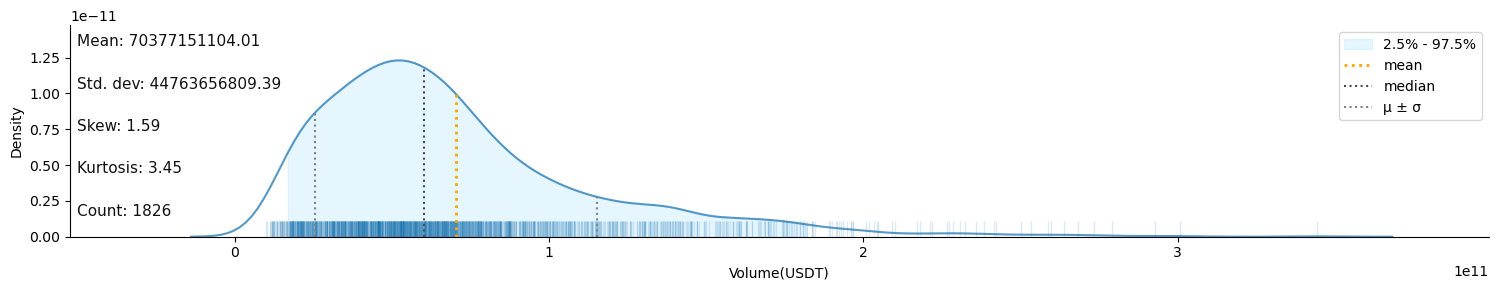

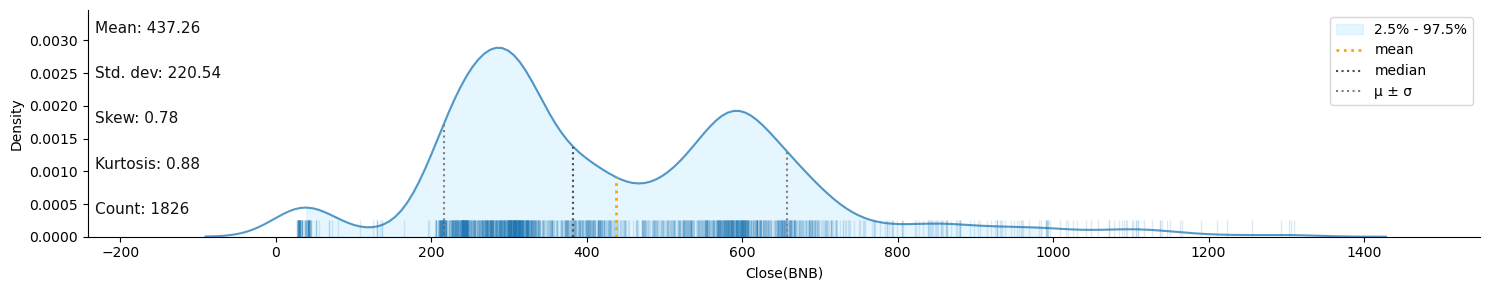

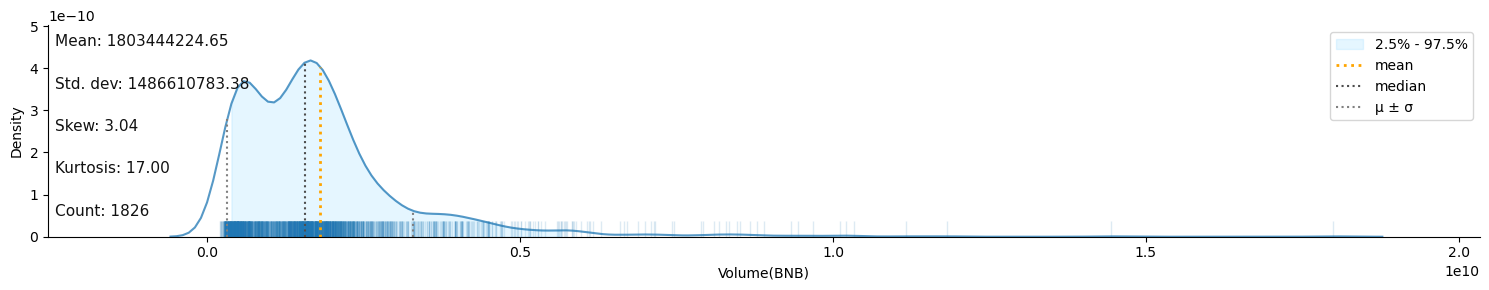

In [36]:
klib.dist_plot(p2)

In [37]:
btc_return= p1['Close(BTC)'].pct_change()

In [38]:
btc_return

Date
2020-11-19 00:00:00+00:00         NaN
2020-11-20 00:00:00+00:00    0.045138
2020-11-21 00:00:00+00:00    0.001123
2020-11-22 00:00:00+00:00   -0.014603
2020-11-23 00:00:00+00:00   -0.000320
                               ...   
2025-11-14 00:00:00+00:00   -0.053158
2025-11-15 00:00:00+00:00    0.012197
2025-11-16 00:00:00+00:00   -0.014360
2025-11-17 00:00:00+00:00   -0.022120
2025-11-18 00:00:00+00:00    0.009284
Name: Close(BTC), Length: 1826, dtype: float64

In [39]:
eth_return= p1['Close(ETH)'].pct_change()

In [40]:
eth_return.describe()

count    1825.000000
mean        0.001901
std         0.041624
min        -0.272003
25%        -0.018084
50%         0.000811
75%         0.021050
max         0.259475
Name: Close(ETH), dtype: float64

In [41]:
usdt_return= p2['Close(USDT)'].pct_change()

In [42]:
bnb_return= p2['Close(BNB)'].pct_change()

<Axes: xlabel='Date'>

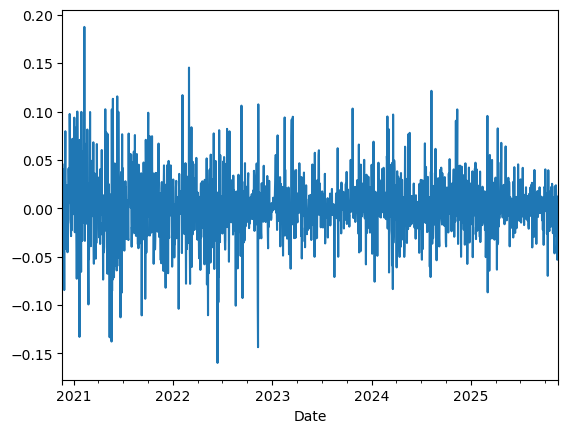

In [43]:
btc_return.plot()

<Axes: xlabel='Date'>

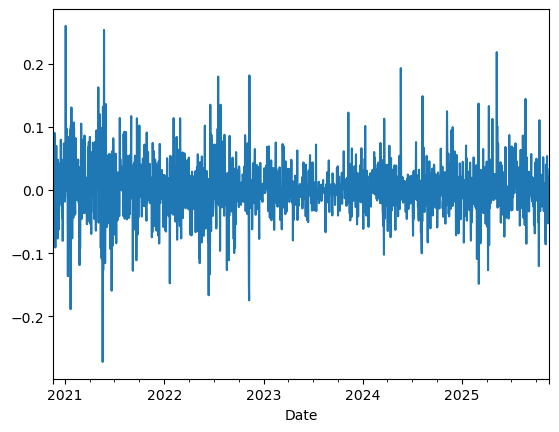

In [44]:
eth_return.plot()

<Axes: xlabel='Date'>

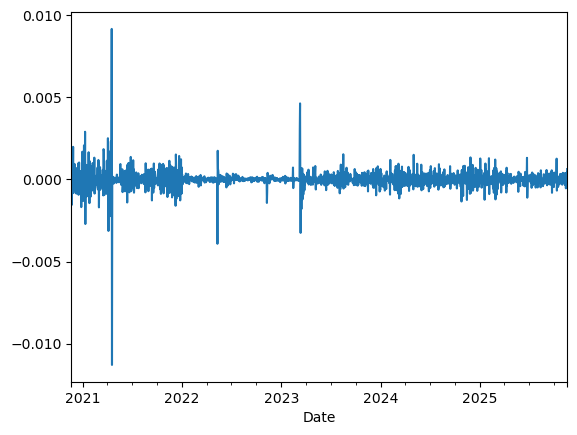

In [45]:
usdt_return.plot()

<Axes: xlabel='Date'>

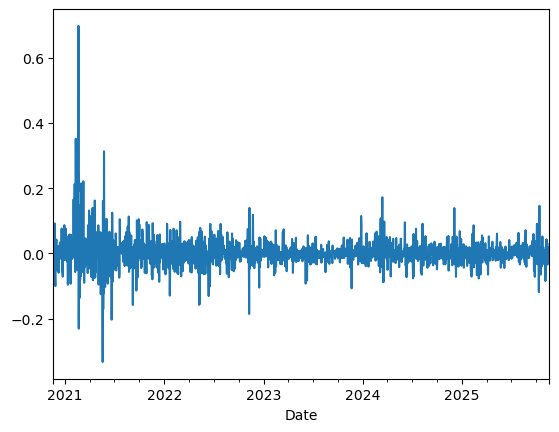

In [46]:
bnb_return.plot()

((array([-3.36715891, -3.11435636, -2.97403263, ...,  2.97403263,
          3.11435636,  3.36715891]),
  array([-0.15974726, -0.14349022, -0.13766123, ...,  0.12144256,
          0.14541184,  0.18746474])),
 (np.float64(0.030153669643105674),
  np.float64(0.001383739345640967),
  np.float64(0.972813785267167)))

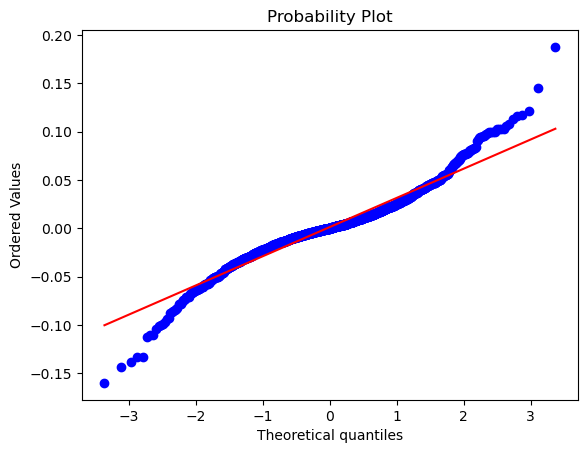

In [47]:
sc.probplot(btc_return.dropna(), dist='norm', plot=plt)

In [48]:
sc.probplot(eth_return.dropna(), dist='norm')

((array([-3.36715891, -3.11435636, -2.97403263, ...,  2.97403263,
          3.11435636,  3.36715891]),
  array([-0.27200349, -0.18860451, -0.1745645 , ...,  0.21798769,
          0.2531363 ,  0.25947533])),
 (np.float64(0.04046663837236941),
  np.float64(0.0019008809466583721),
  np.float64(0.97086398320031)))

((array([-3.36715891, -3.11435636, -2.97403263, ...,  2.97403263,
          3.11435636,  3.36715891]),
  array([-0.27200349, -0.18860451, -0.1745645 , ...,  0.21798769,
          0.2531363 ,  0.25947533])),
 (np.float64(0.04046663837236941),
  np.float64(0.0019008809466583721),
  np.float64(0.97086398320031)))

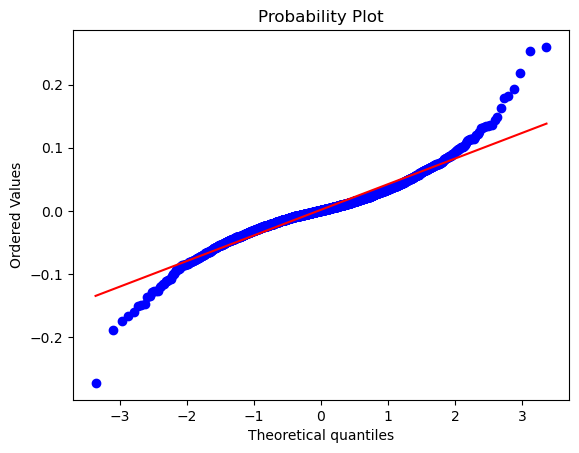

In [49]:
sc.probplot(eth_return.dropna(), dist='norm', plot=plt)

((array([-3.36715891, -3.11435636, -2.97403263, ...,  2.97403263,
          3.11435636,  3.36715891]),
  array([-0.33265631, -0.23048286, -0.20314445, ...,  0.31323562,
          0.35158701,  0.69760404])),
 (np.float64(0.03971939800559014),
  np.float64(0.002858033034633226),
  np.float64(0.8935343462141736)))

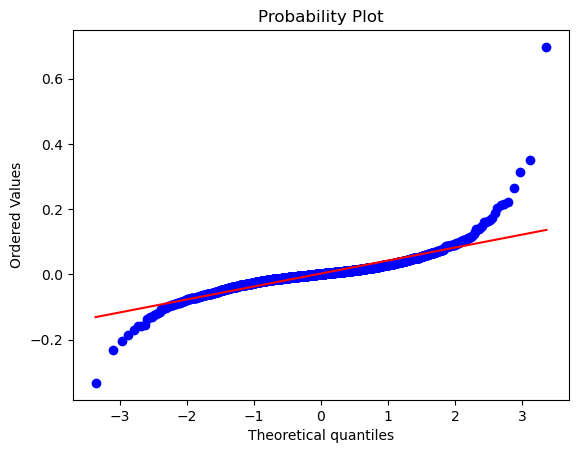

In [50]:
sc.probplot(bnb_return.dropna(), dist='norm', plot=plt)

((array([-3.36715891, -3.11435636, -2.97403263, ...,  2.97403263,
          3.11435636,  3.36715891]),
  array([-0.01129585, -0.00391982, -0.0032557 , ...,  0.00306104,
          0.00462886,  0.00916359])),
 (np.float64(0.0004625017888514337),
  np.float64(-5.213257975834609e-07),
  np.float64(0.7996867179067031)))

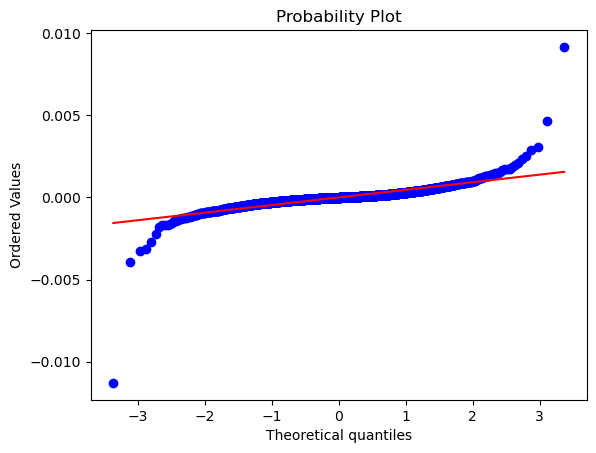

In [51]:
sc.probplot(usdt_return.dropna(), dist='norm', plot=plt)

<Axes: xlabel='Date'>

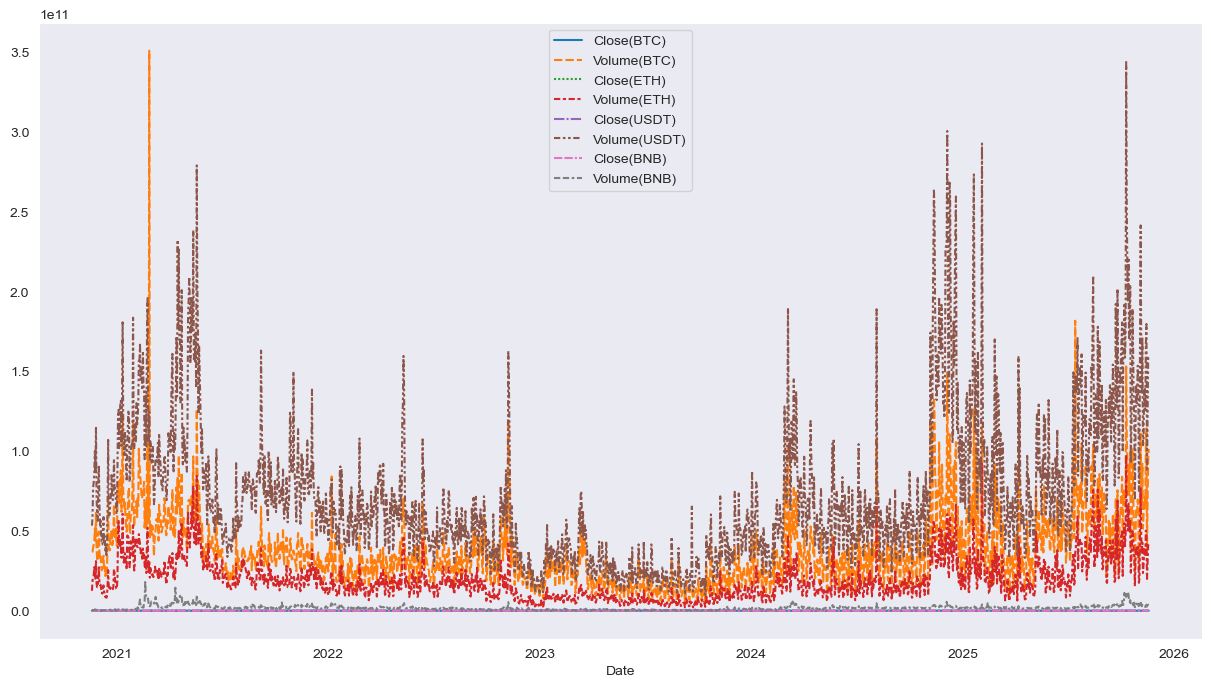

In [52]:
plt.figure(figsize=(15,8))
sb.set_style('dark')
sb.lineplot(data=data)

<Axes: xlabel='Close(BTC)', ylabel='Count'>

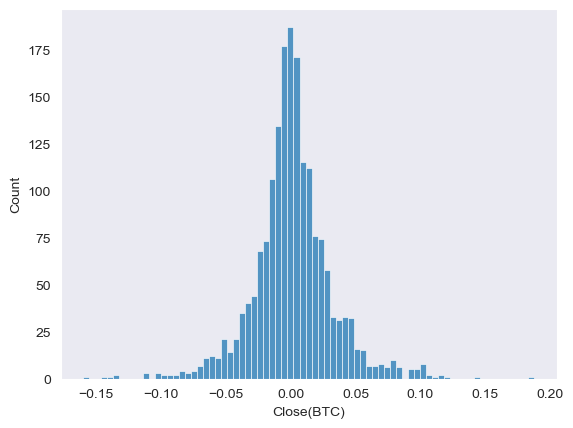

In [53]:
sb.histplot(btc_return)

<Axes: xlabel='Close(ETH)', ylabel='Count'>

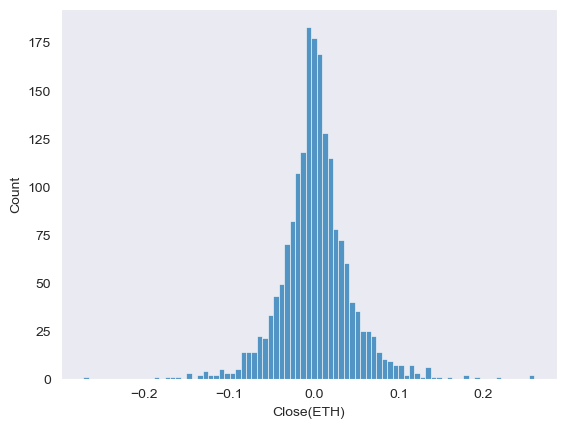

In [54]:
sb.histplot(eth_return)

<Axes: xlabel='Close(BNB)', ylabel='Count'>

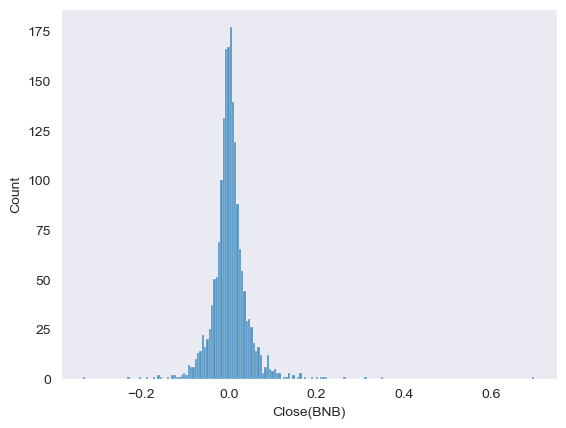

In [55]:
sb.histplot(bnb_return)

<Axes: xlabel='Close(USDT)', ylabel='Count'>

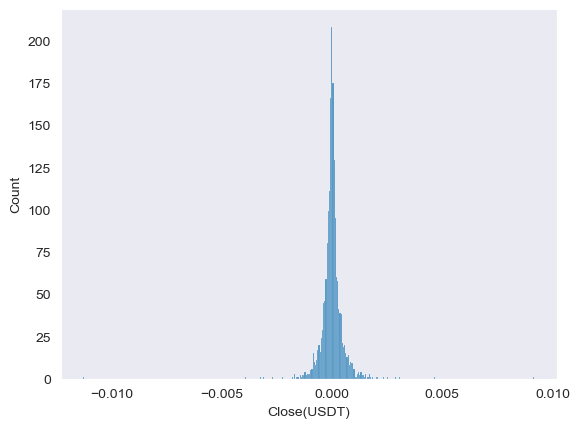

In [56]:
sb.histplot(usdt_return)

In [57]:
corr_mat= data.corr()
corr_mat

Close(BTC)  Volume(BTC)  Close(ETH)  Volume(ETH)  Close(USDT)  \
Close(BTC)      1.000000     0.465938    0.675185     0.507949     0.005670   
Volume(BTC)     0.465938     1.000000    0.255833     0.849877     0.134868   
Close(ETH)      0.675185     0.255833    1.000000     0.406563     0.064392   
Volume(ETH)     0.507949     0.849877    0.406563     1.000000     0.135566   
Close(USDT)     0.005670     0.134868    0.064392     0.135566     1.000000   
Volume(USDT)    0.575058     0.878589    0.455681     0.932127     0.162017   
Close(BNB)      0.881953     0.345636    0.787085     0.439664    -0.032998   
Volume(BNB)     0.425073     0.567155    0.447612     0.654028     0.129334   

              Volume(USDT)  Close(BNB)  Volume(BNB)  
Close(BTC)        0.575058    0.881953     0.425073  
Volume(BTC)       0.878589    0.345636     0.567155  
Close(ETH)        0.455681    0.787085     0.447612  
Volume(ETH)       0.932127    0.439664     0.654028  
Close(USDT)       0.162017   -0.032998     0.129334  
Volume(USDT)      1.000000    0.500239     0.694253  
Close(BNB)        0.500239    1.000000     0.489522  
Volume(BNB)       0.694253    0.489522     1.000000

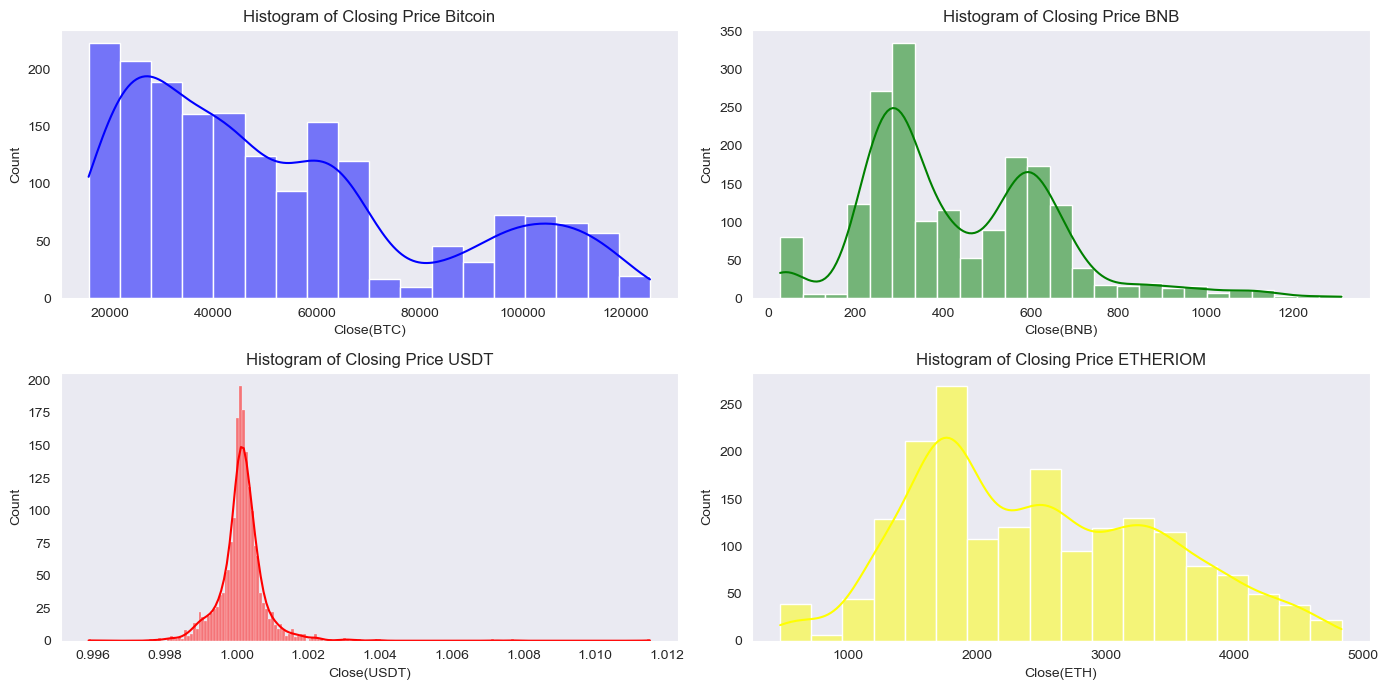

In [58]:
plt.figure(figsize=(14,7))
           
plt.subplot(2,2,1)
sb.histplot(data['Close(BTC)'], kde=True, color='blue')
plt.title('Histogram of Closing Price Bitcoin')

plt.subplot(2,2,2)
sb.histplot(data['Close(BNB)'], kde=True, color='green')
plt.title('Histogram of Closing Price BNB')

plt.subplot(2,2,3)
sb.histplot(data['Close(USDT)'], kde=True, color='red')
plt.title('Histogram of Closing Price USDT')


plt.subplot(2,2,4)
sb.histplot(data['Close(ETH)'], kde=True, color='yellow') 
plt.title('Histogram of Closing Price ETHERIOM')

plt.tight_layout()
plt.show()

<Axes: xlabel='Volume(BNB)', ylabel='Density'>

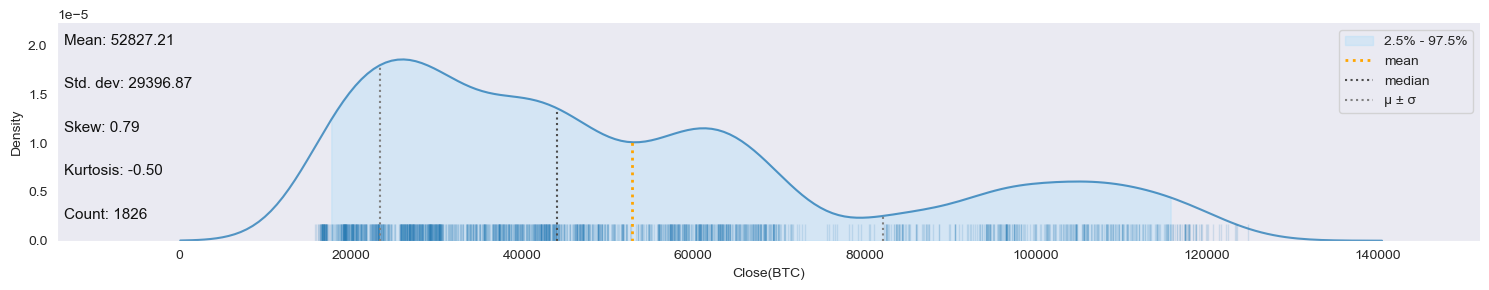

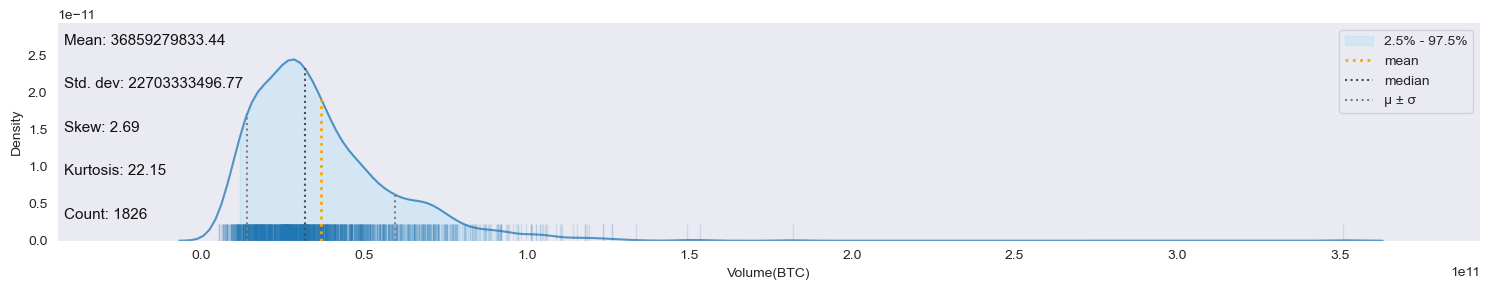

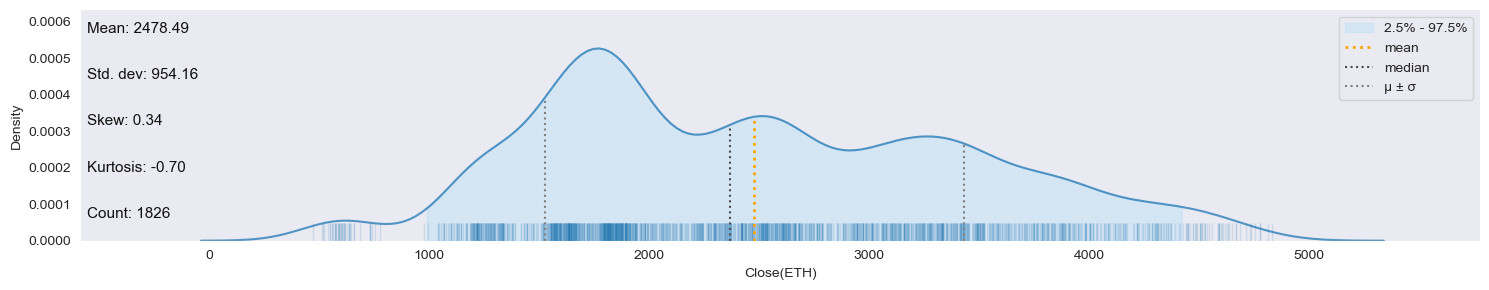

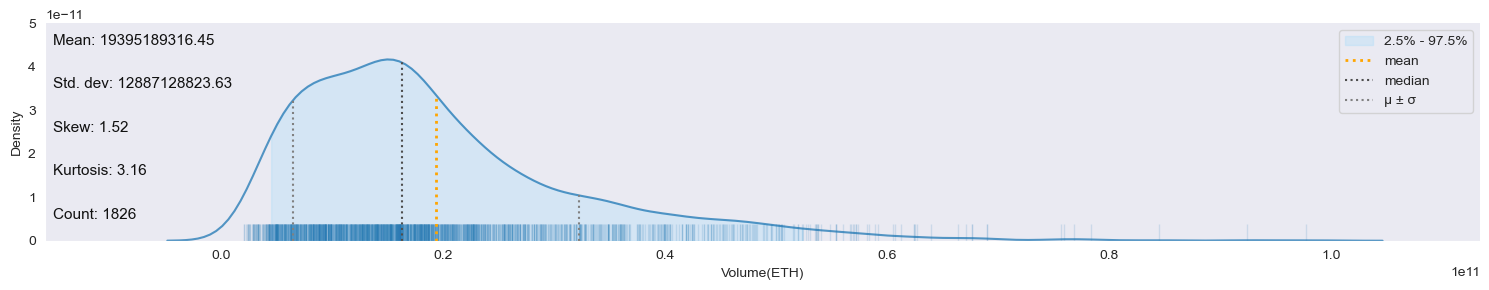

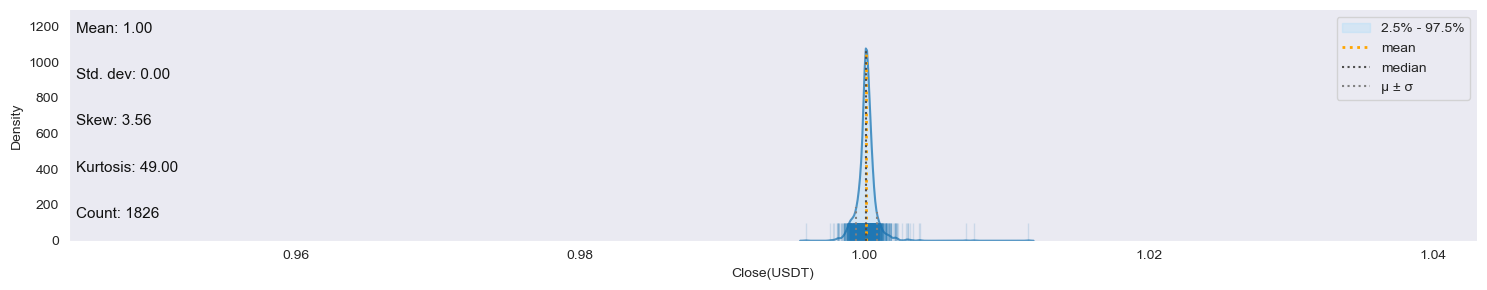

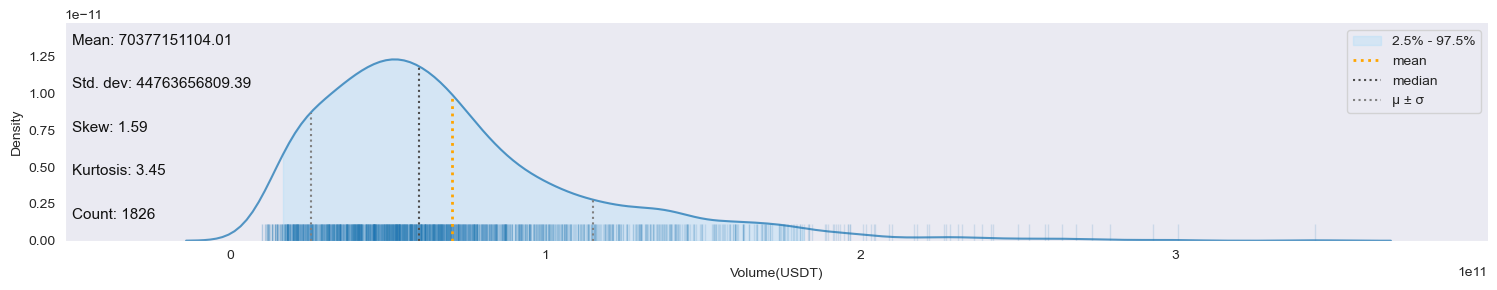

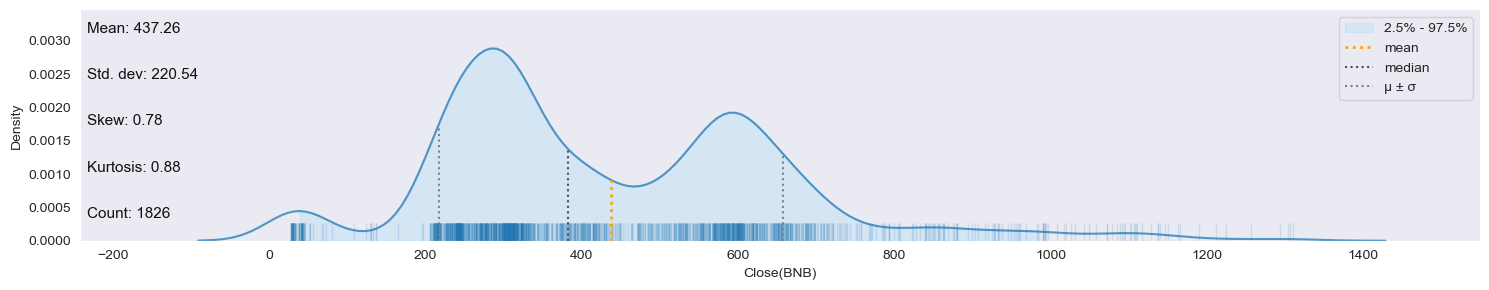

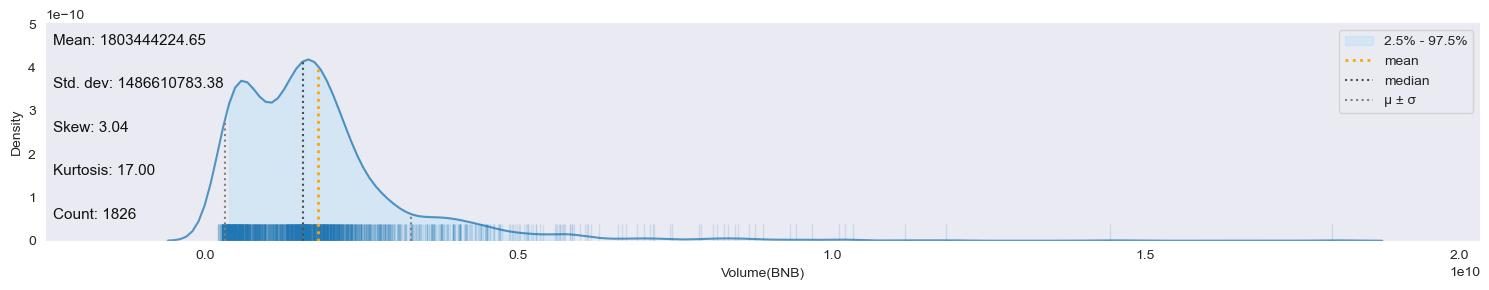

In [59]:
klib.dist_plot(data)

<Axes: xlabel='Close(BTC)', ylabel='Density'>

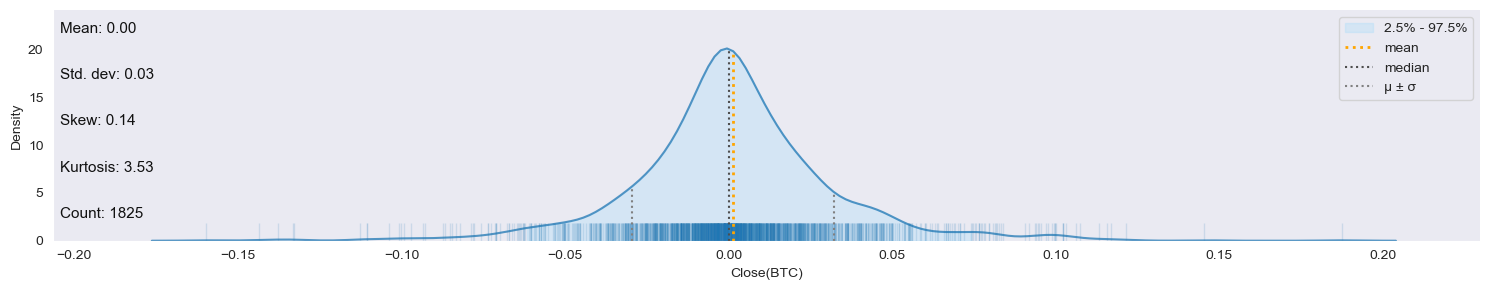

In [60]:
klib.dist_plot(btc_return)

<Axes: xlabel='Close(BNB)', ylabel='Density'>

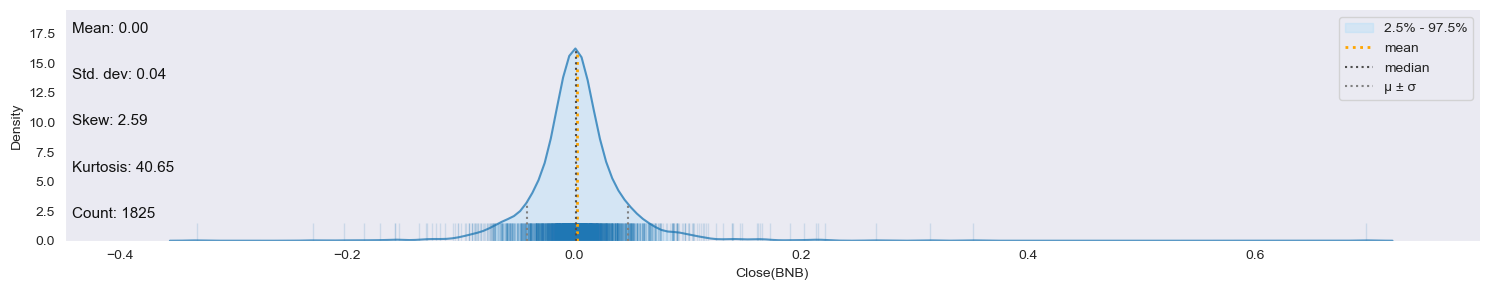

In [61]:
klib.dist_plot(bnb_return)

<Axes: xlabel='Close(ETH)', ylabel='Density'>

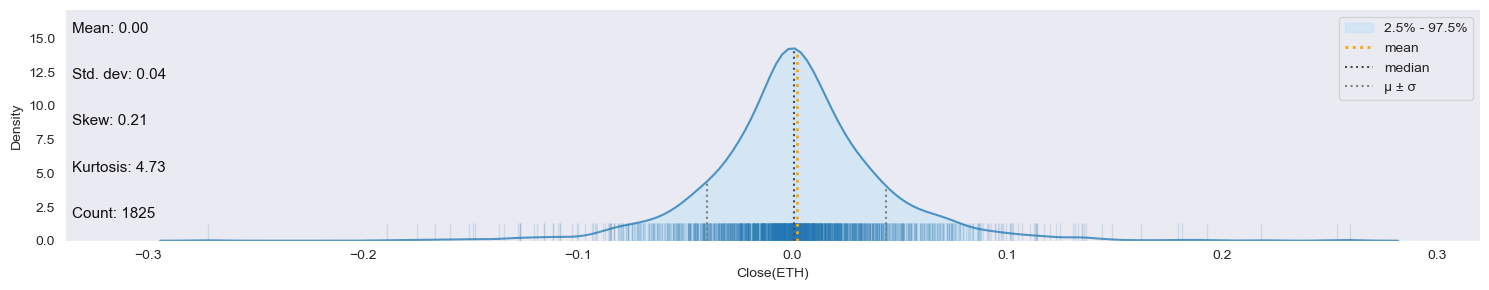

In [62]:
klib.dist_plot(eth_return)

<Axes: xlabel='Close(USDT)', ylabel='Density'>

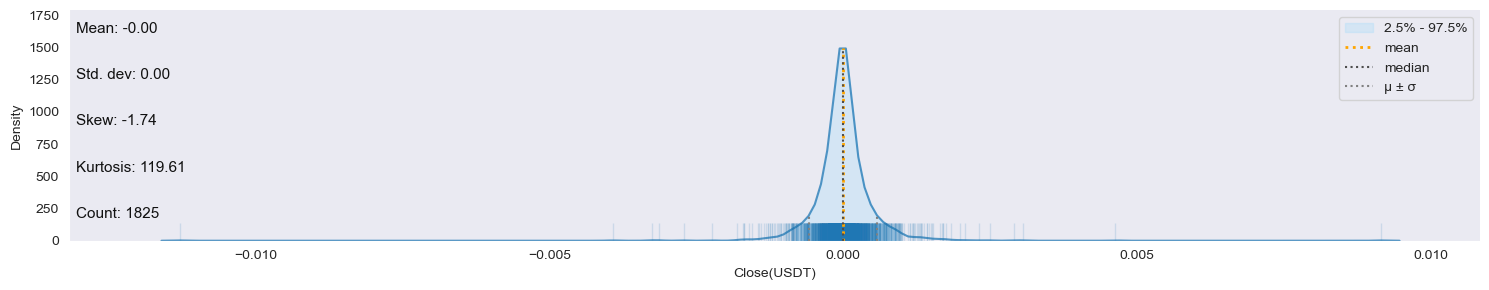

In [63]:
klib.dist_plot(usdt_return)

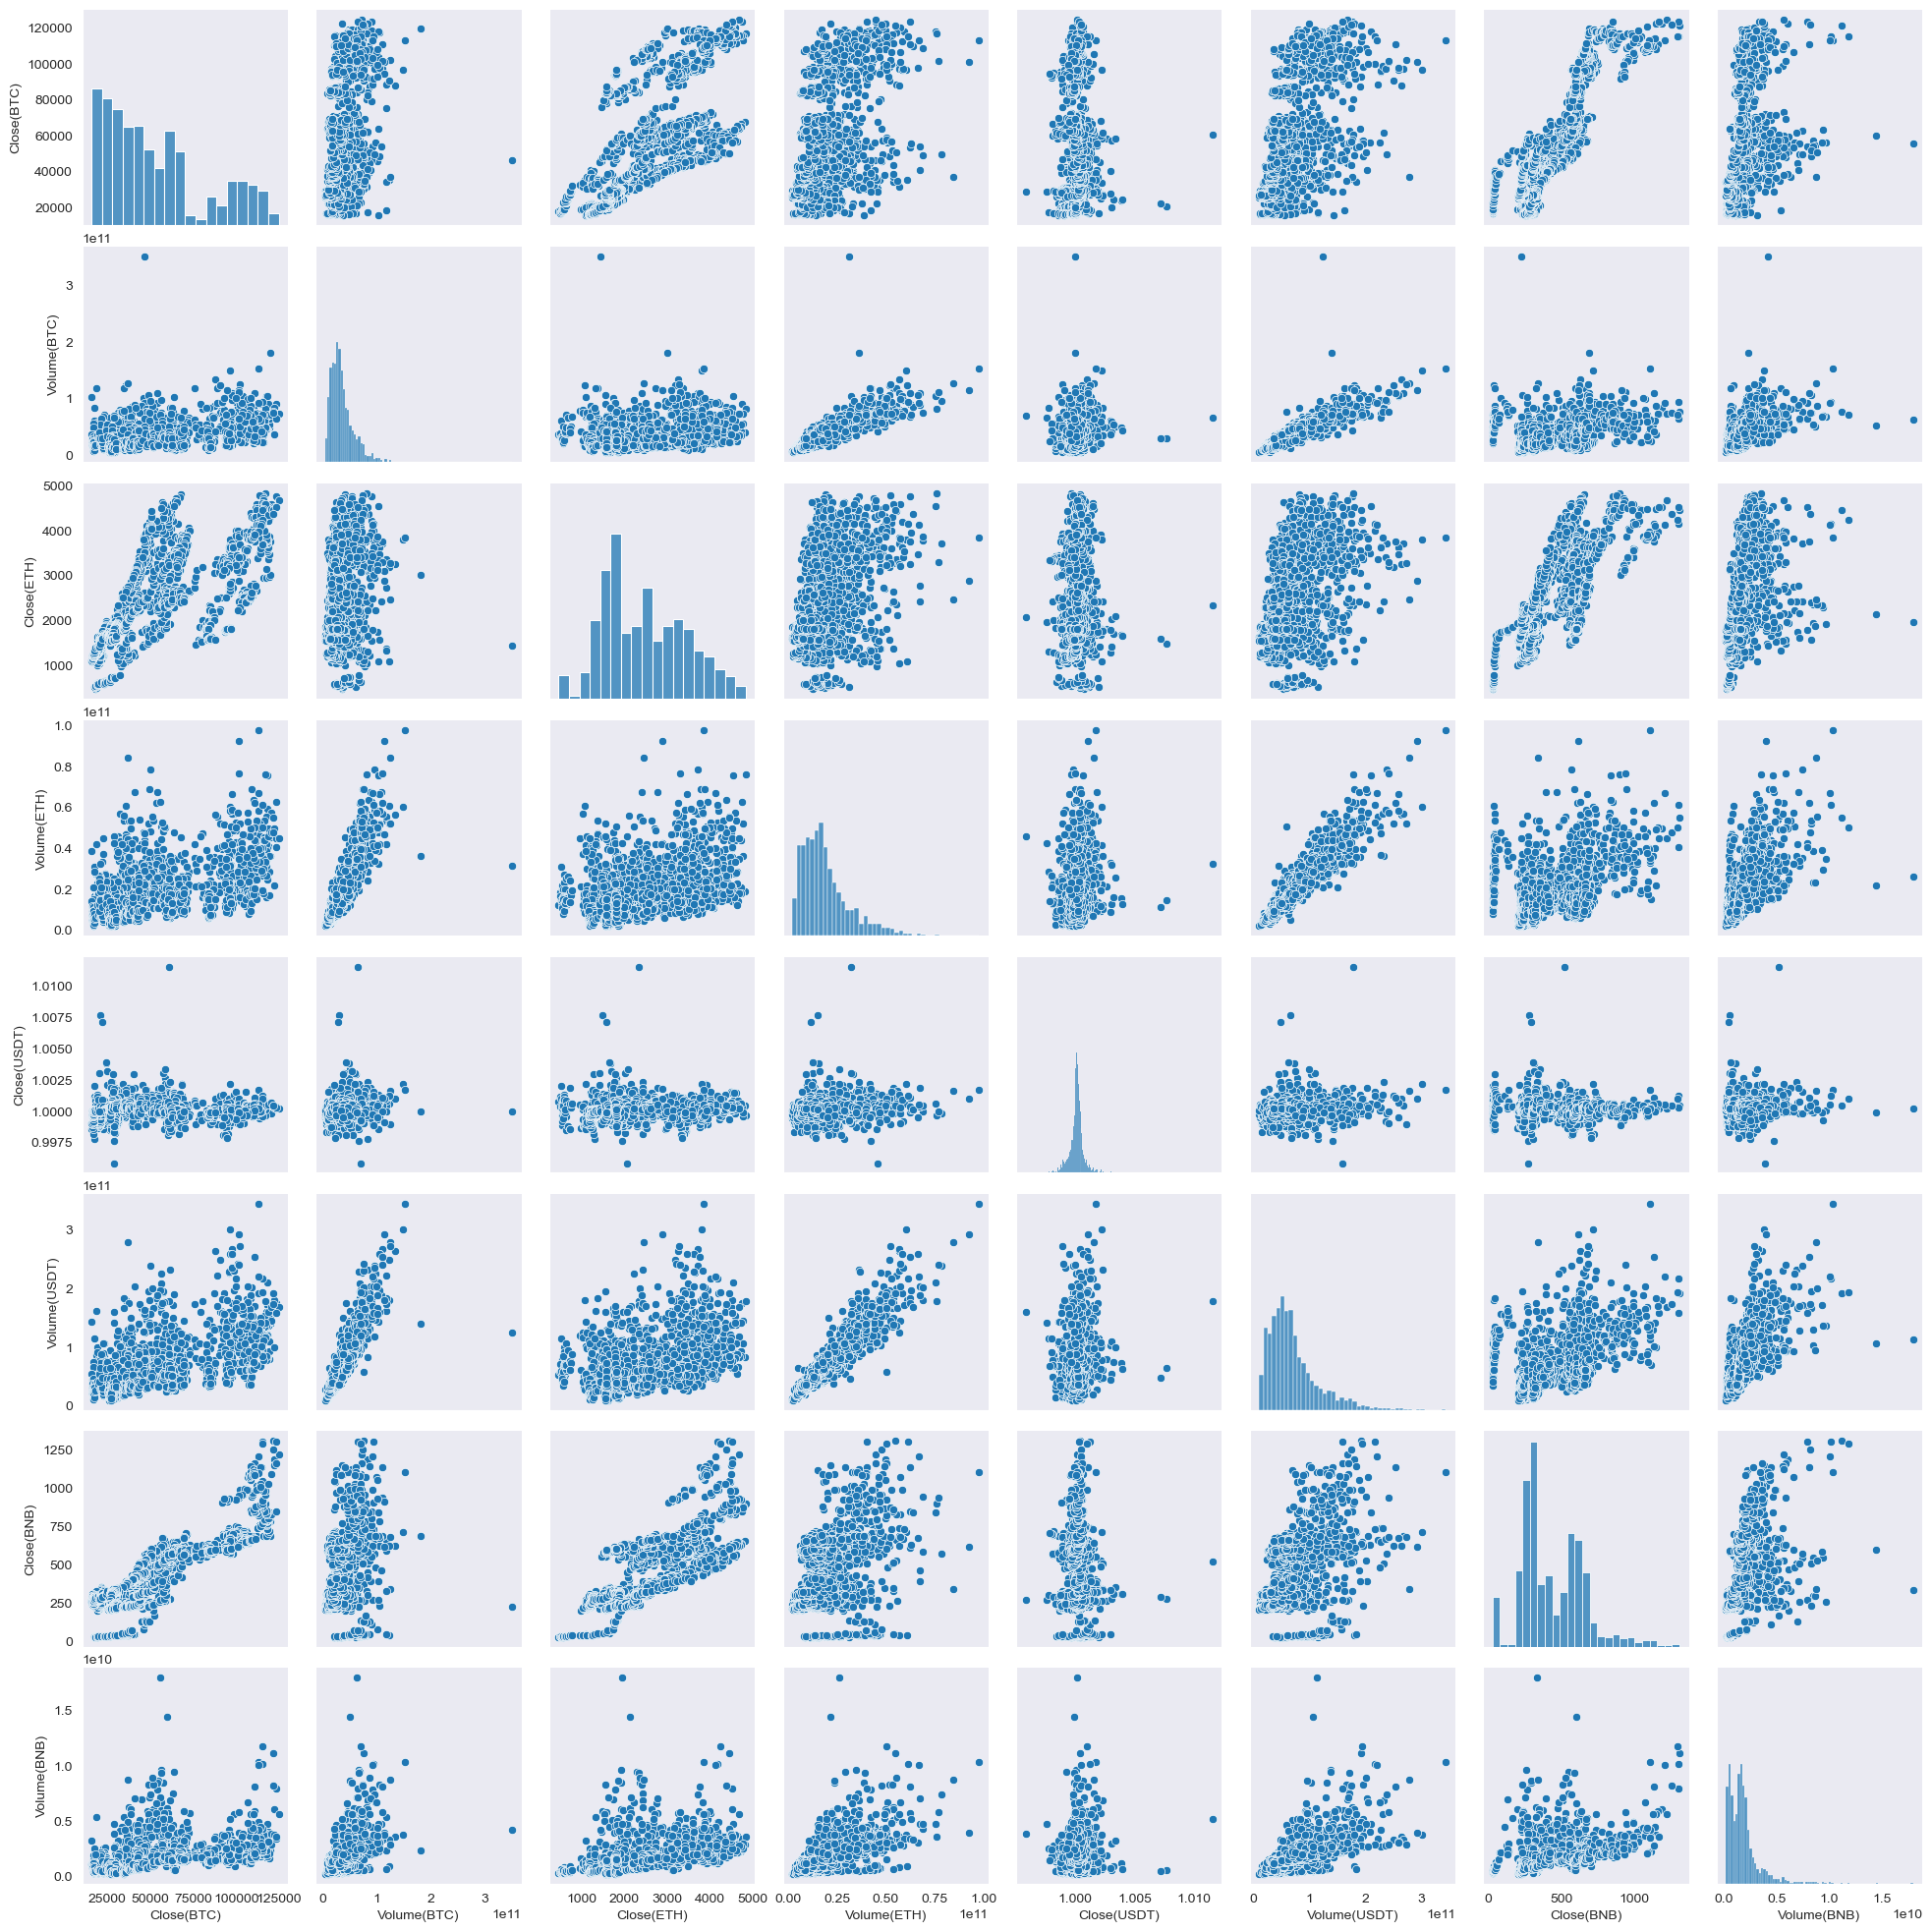

In [64]:
sb.pairplot(data)

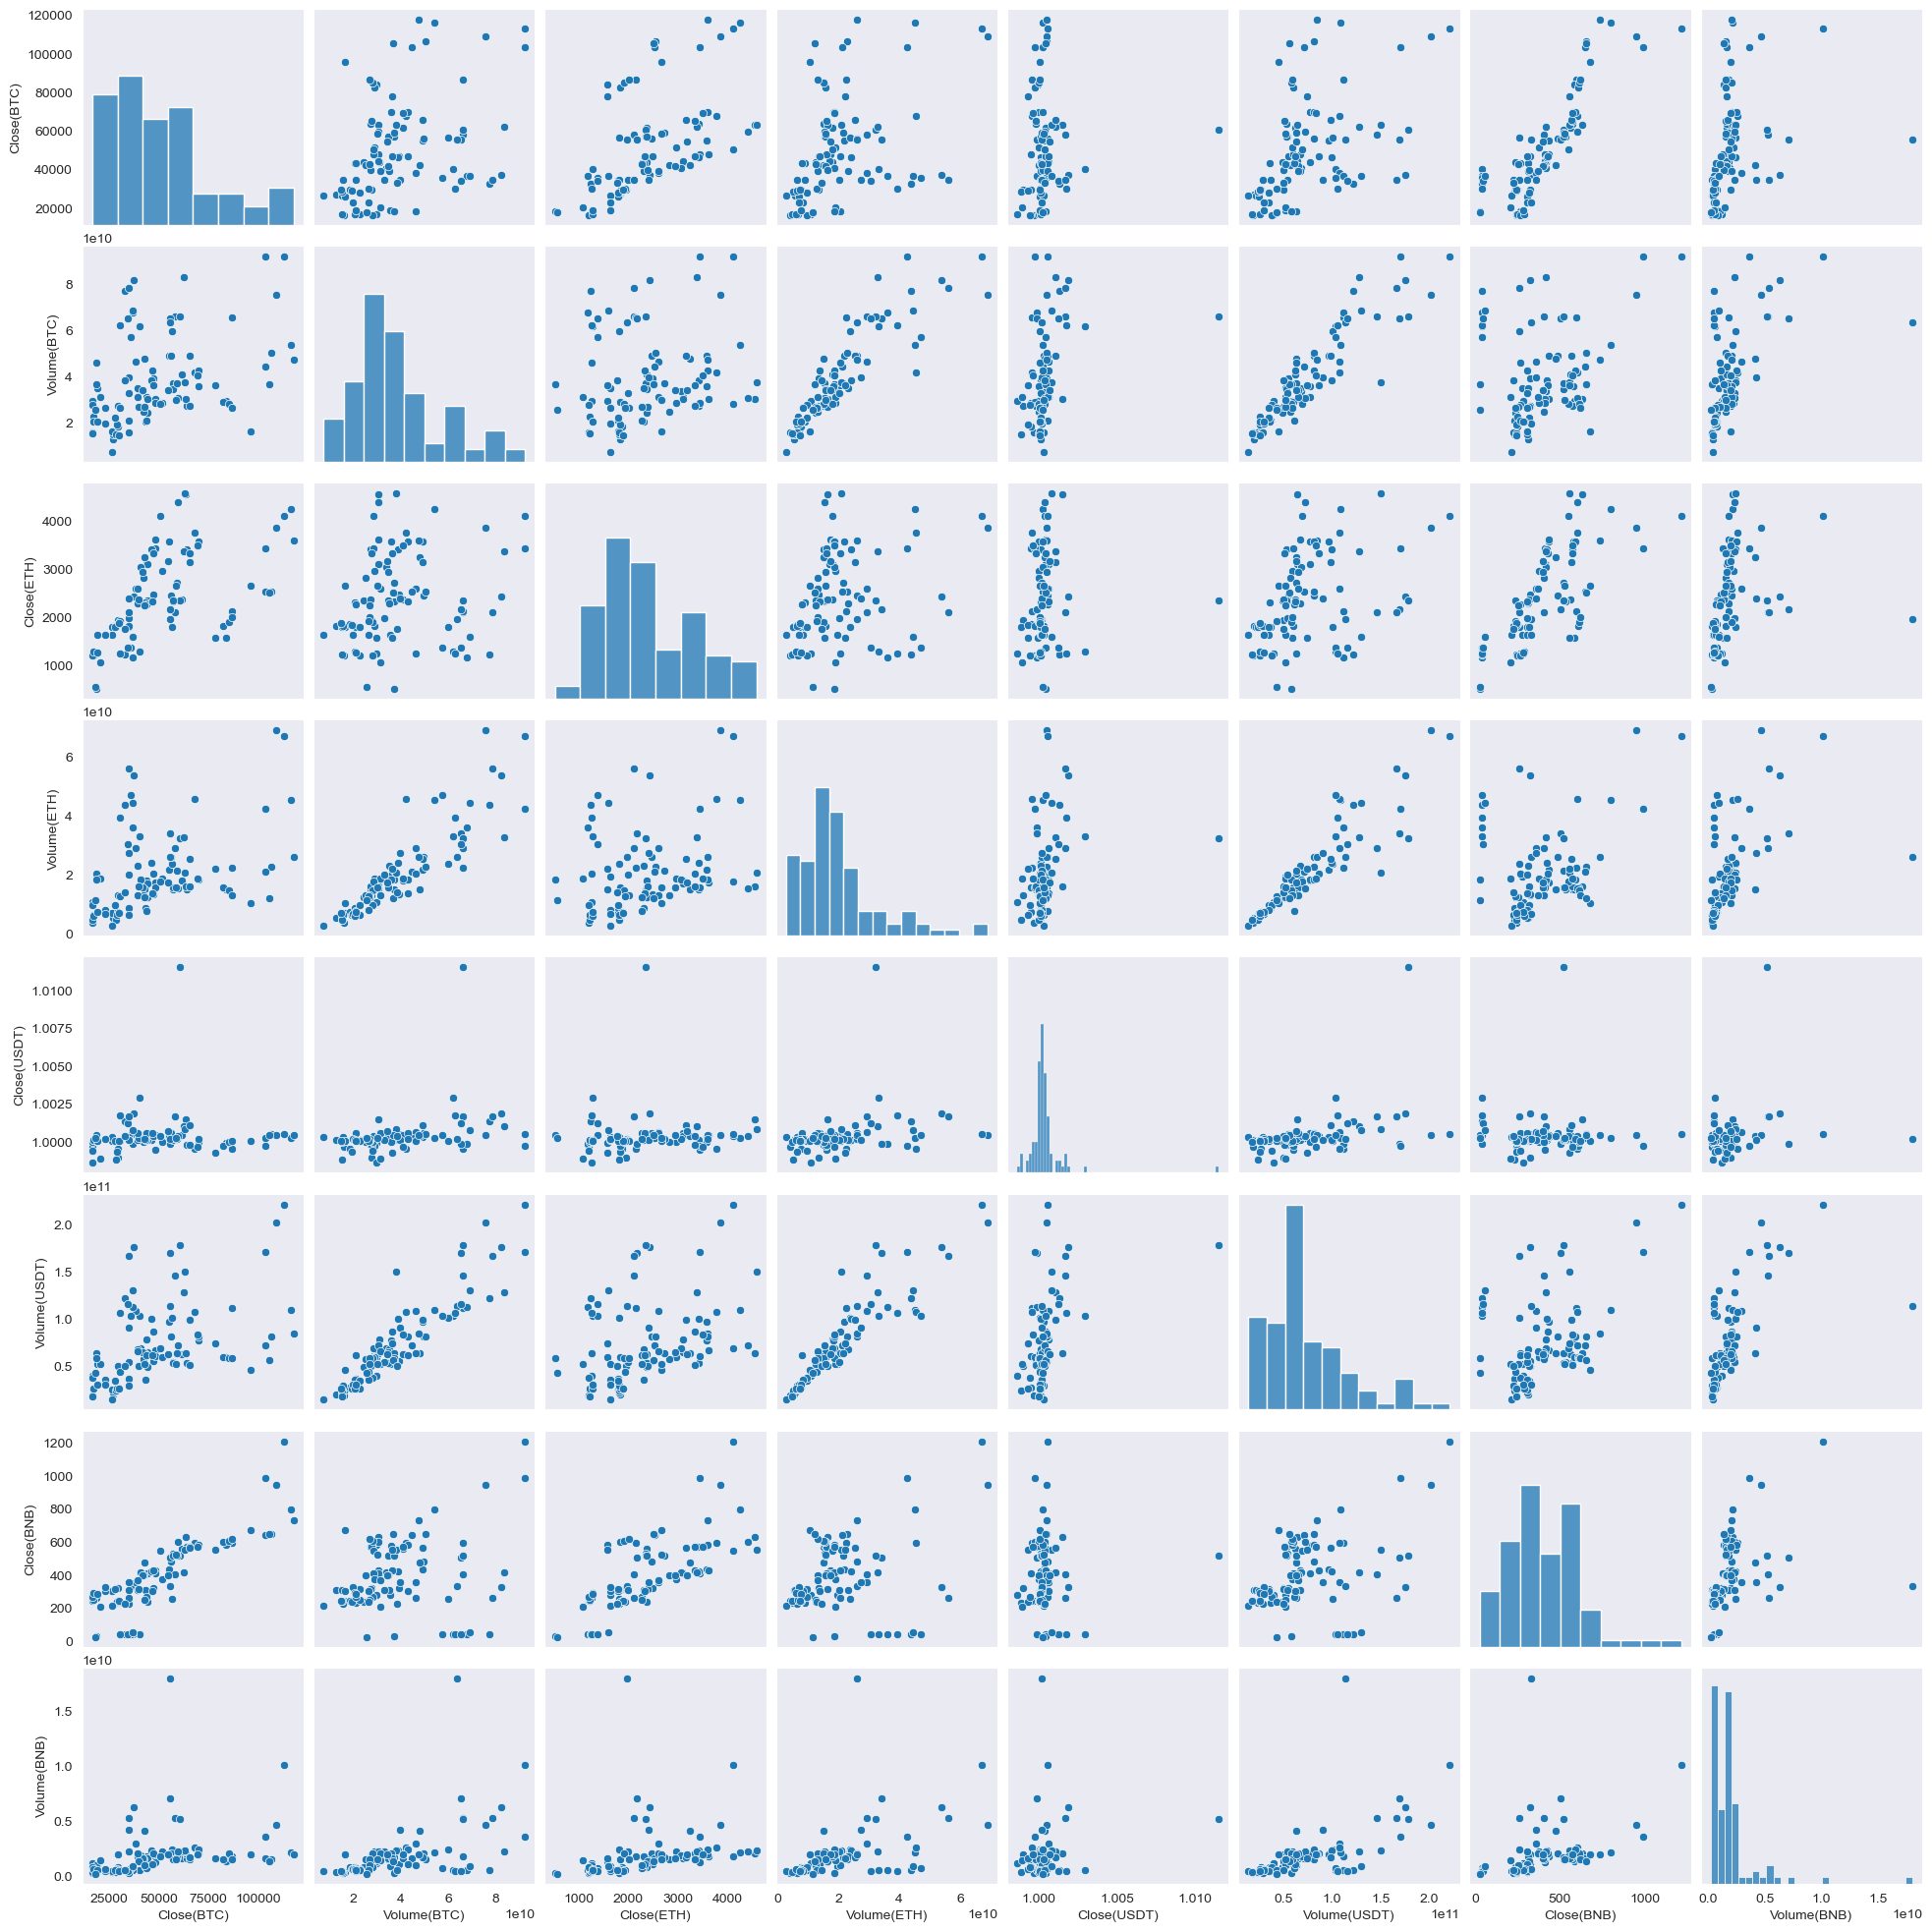

In [65]:
sb.pairplot(data.sample(n=100))

In [66]:
x= data.drop(columns=['Close(BTC)'], axis=1)
y=data.loc[:, 'Close(BTC)']

In [67]:
x

Volume(BTC)   Close(ETH)  Volume(ETH)  \
Date                                                                
2020-11-19 00:00:00+00:00   36985055355   471.630432  12473929218   
2020-11-20 00:00:00+00:00   36992873940   509.744568  18629943296   
2020-11-21 00:00:00+00:00   39650210707   549.486633  20757099184   
2020-11-22 00:00:00+00:00   41280434226   558.068115  21967049601   
2020-11-23 00:00:00+00:00   42741112308   608.454041  27272302872   
...                                 ...          ...          ...   
2025-11-14 00:00:00+00:00  114346441890  3103.785645  47003809463   
2025-11-15 00:00:00+00:00   38500716654  3166.631348  19932940649   
2025-11-16 00:00:00+00:00   71086235862  3092.847412  30987886524   
2025-11-17 00:00:00+00:00   94186165724  3024.538818  41026793235   
2025-11-18 00:00:00+00:00  101333569062  3122.979004  41581494270   

                           Close(USDT)  Volume(USDT)  Close(BNB)  Volume(BNB)  
Date                                                                           
2020-11-19 00:00:00+00:00     1.000781   53334422091   28.094105    282317319  
2020-11-20 00:00:00+00:00     1.000427   58285960281   28.891996    321436881  
2020-11-21 00:00:00+00:00     0.998874   77062206041   30.391291    419204706  
2020-11-22 00:00:00+00:00     0.999203   80187383235   29.925072    426289161  
2020-11-23 00:00:00+00:00     1.000092   85808045491   30.965368    433686948  
...                                ...           ...         ...          ...  
2025-11-14 00:00:00+00:00     0.999129  179708124711  915.309265   3778463496  
2025-11-15 00:00:00+00:00     0.999531   87346757339  932.201904   1963778260  
2025-11-16 00:00:00+00:00     0.999262  119937340292  927.257874   2497118342  
2025-11-17 00:00:00+00:00     0.998895  158466587927  906.482422   3757441490  
2025-11-18 00:00:00+00:00     0.999525  156914958706  932.482361   3623344375  

[1826 rows x 7 columns]

In [68]:
y

Date
2020-11-19 00:00:00+00:00    17817.089844
2020-11-20 00:00:00+00:00    18621.314453
2020-11-21 00:00:00+00:00    18642.232422
2020-11-22 00:00:00+00:00    18370.001953
2020-11-23 00:00:00+00:00    18364.121094
                                 ...     
2025-11-14 00:00:00+00:00    94397.789062
2025-11-15 00:00:00+00:00    95549.148438
2025-11-16 00:00:00+00:00    94177.078125
2025-11-17 00:00:00+00:00    92093.875000
2025-11-18 00:00:00+00:00    92948.875000
Name: Close(BTC), Length: 1826, dtype: float64

In [69]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=0 )

In [70]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1460, 7), (366, 7), (1460,), (366,))

In [71]:
x

Volume(BTC)   Close(ETH)  Volume(ETH)  \
Date                                                                
2020-11-19 00:00:00+00:00   36985055355   471.630432  12473929218   
2020-11-20 00:00:00+00:00   36992873940   509.744568  18629943296   
2020-11-21 00:00:00+00:00   39650210707   549.486633  20757099184   
2020-11-22 00:00:00+00:00   41280434226   558.068115  21967049601   
2020-11-23 00:00:00+00:00   42741112308   608.454041  27272302872   
...                                 ...          ...          ...   
2025-11-14 00:00:00+00:00  114346441890  3103.785645  47003809463   
2025-11-15 00:00:00+00:00   38500716654  3166.631348  19932940649   
2025-11-16 00:00:00+00:00   71086235862  3092.847412  30987886524   
2025-11-17 00:00:00+00:00   94186165724  3024.538818  41026793235   
2025-11-18 00:00:00+00:00  101333569062  3122.979004  41581494270   

                           Close(USDT)  Volume(USDT)  Close(BNB)  Volume(BNB)  
Date                                                                           
2020-11-19 00:00:00+00:00     1.000781   53334422091   28.094105    282317319  
2020-11-20 00:00:00+00:00     1.000427   58285960281   28.891996    321436881  
2020-11-21 00:00:00+00:00     0.998874   77062206041   30.391291    419204706  
2020-11-22 00:00:00+00:00     0.999203   80187383235   29.925072    426289161  
2020-11-23 00:00:00+00:00     1.000092   85808045491   30.965368    433686948  
...                                ...           ...         ...          ...  
2025-11-14 00:00:00+00:00     0.999129  179708124711  915.309265   3778463496  
2025-11-15 00:00:00+00:00     0.999531   87346757339  932.201904   1963778260  
2025-11-16 00:00:00+00:00     0.999262  119937340292  927.257874   2497118342  
2025-11-17 00:00:00+00:00     0.998895  158466587927  906.482422   3757441490  
2025-11-18 00:00:00+00:00     0.999525  156914958706  932.482361   3623344375  

[1826 rows x 7 columns]

In [72]:
y

Date
2020-11-19 00:00:00+00:00    17817.089844
2020-11-20 00:00:00+00:00    18621.314453
2020-11-21 00:00:00+00:00    18642.232422
2020-11-22 00:00:00+00:00    18370.001953
2020-11-23 00:00:00+00:00    18364.121094
                                 ...     
2025-11-14 00:00:00+00:00    94397.789062
2025-11-15 00:00:00+00:00    95549.148438
2025-11-16 00:00:00+00:00    94177.078125
2025-11-17 00:00:00+00:00    92093.875000
2025-11-18 00:00:00+00:00    92948.875000
Name: Close(BTC), Length: 1826, dtype: float64

In [73]:
from sklearn.feature_selection import SelectKBest

In [74]:
fs= SelectKBest(k=4)
x_train =fs.fit_transform(x_train, y_train)
x_test= fs.transform(x_test)

C:\Users\10\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:108: RuntimeWarning:

invalid value encountered in divide



In [75]:
mask= fs.get_support()
selected_features= x.columns[mask]

In [76]:
print('selected features are:', selected_features)

selected features are: Index(['Close(USDT)', 'Volume(USDT)', 'Close(BNB)', 'Volume(BNB)'], dtype='object')


In [77]:
from sklearn.preprocessing import MinMaxScaler

In [78]:
scaler= MinMaxScaler()
x_train= scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

In [79]:
x_train

array([[0.2497735 , 0.36490306, 0.5049768 , 0.14930539],
       [0.21311544, 0.13010176, 0.41732343, 0.11666496],
       [0.27027233, 0.49468479, 0.52896398, 0.18846253],
       ...,
       [0.27251064, 0.27872156, 0.4896282 , 0.1463888 ],
       [0.21637394, 0.17606291, 0.21291838, 0.1342722 ],
       [0.27966715, 0.10321453, 0.20964006, 0.05085159]])

In [80]:
x_test

array([[0.27748974, 0.0911484 , 0.21194953, 0.04744808],
       [0.27021142, 0.06656838, 0.21238867, 0.02805533],
       [0.20506818, 0.25210958, 0.18902695, 0.17798584],
       ...,
       [0.29020396, 0.37901573, 0.53066478, 0.18032933],
       [0.29160481, 0.2226266 , 0.30409544, 0.20804171],
       [0.23176423, 0.09891145, 0.21855271, 0.10188483]])

In [81]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [82]:
Models={
    "linearregression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=1.0),
    "ElasticNetRegression": ElasticNet(alpha=1.0 , l1_ratio= 0.5),
    "Support Vector Regression": SVR(kernel='rbf'),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "Random Forest Regression": RandomForestRegressor(n_estimators=100),
    "Gradient Boosting Regression": GradientBoostingRegressor(n_estimators=100, learning_rate= 0.1, max_depth=3, random_state=42),
    "K-Nearest Neighbors Regression": KNeighborsRegressor(n_neighbors=5),
    "Neural Network Regression(MLP)": MLPRegressor(hidden_layer_sizes=(100,50) ,activation='relu', random_state=42)
}



In [83]:
results={'Model':[],'MSE':[],'R-squared':[]}

In [84]:
results

{'Model': [], 'MSE': [], 'R-squared': []}

In [85]:
for name, model in Models.items():
     model.fit(x_train, y_train)
     y_pred=model.predict(x_test)
     mse= mean_squared_error(y_test, y_pred)
     r2= r2_score(y_test, y_pred)

results['Model'].append(name)
results['MSE'].append(mse)
results['R-squared'].append(r2)


C:\Users\10\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



In [86]:
print(f"---{name}---")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-Squared: {r2}")
print()

---Neural Network Regression(MLP)---
Mean Squared Error (MSE): 577168131.5491315
R-Squared: 0.32739895212270387



In [87]:
results

{'Model': ['Neural Network Regression(MLP)'],
 'MSE': [577168131.5491315],
 'R-squared': [0.32739895212270387]}

In [88]:
results_df= pd.DataFrame(results)


In [89]:
results_df

Model           MSE  R-squared
0  Neural Network Regression(MLP)  5.771681e+08   0.327399

In [90]:
Models={
    "linearregression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=1.0),
    "ElasticNetRegression": ElasticNet(alpha=1.0 , l1_ratio= 0.5),
    "Support Vector Regression": SVR(kernel='rbf'),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "Random Forest Regression": RandomForestRegressor(n_estimators=100),
    "Gradient Boosting Regression": GradientBoostingRegressor(n_estimators=100, learning_rate= 0.1, max_depth=3, random_state=42),
    "K-Nearest Neighbors Regression": KNeighborsRegressor(n_neighbors=5),
    "Neural Network Regression(MLP)": MLPRegressor(hidden_layer_sizes=(100,50) ,activation='relu', random_state=42)
}
results={'Model':[],'MSE':[],'R-squared':[]}

for name, model in Models.items():
     model.fit(x_train, y_train)
     y_pred=model.predict(x_test)
     mse= mean_squared_error(y_test, y_pred)
     r2= r2_score(y_test, y_pred)

     results['Model'].append(name)
     results['MSE'].append(mse)
     results['R-squared'].append(r2)
     print(f"---{name}---")
     print(f"Mean Squared Error (MSE): {mse}")
     print(f"R-Squared: {r2}")
     print()


---linearregression---
Mean Squared Error (MSE): 158929665.75654045
R-Squared: 0.8147918190844569

---Ridge Regression---
Mean Squared Error (MSE): 157334329.39857993
R-Squared: 0.8166509392392738

---Lasso Regression---
Mean Squared Error (MSE): 158832937.88817856
R-Squared: 0.8149045405984541

---ElasticNetRegression---
Mean Squared Error (MSE): 763627413.4792954
R-Squared: 0.11010922048754579

---Support Vector Regression---
Mean Squared Error (MSE): 907267978.9150851
R-Squared: -0.05728185595752522

---Decision Tree Regression---
Mean Squared Error (MSE): 76666089.42282835
R-Squared: 0.9106574163337026

---Random Forest Regression---
Mean Squared Error (MSE): 43700274.156075455
R-Squared: 0.9490740243904139

---Gradient Boosting Regression---
Mean Squared Error (MSE): 49816274.65401166
R-Squared: 0.941946762646615

---K-Nearest Neighbors Regression---
Mean Squared Error (MSE): 47839300.19035946
R-Squared: 0.944250623555065

---Neural Network Regression(MLP)---
Mean Squared Error (M

C:\Users\10\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



In [91]:
results

{'Model': ['linearregression',
  'Ridge Regression',
  'Lasso Regression',
  'ElasticNetRegression',
  'Support Vector Regression',
  'Decision Tree Regression',
  'Random Forest Regression',
  'Gradient Boosting Regression',
  'K-Nearest Neighbors Regression',
  'Neural Network Regression(MLP)'],
 'MSE': [158929665.75654045,
  157334329.39857993,
  158832937.88817856,
  763627413.4792954,
  907267978.9150851,
  76666089.42282835,
  43700274.156075455,
  49816274.65401166,
  47839300.19035946,
  577168131.5491315],
 'R-squared': [0.8147918190844569,
  0.8166509392392738,
  0.8149045405984541,
  0.11010922048754579,
  -0.05728185595752522,
  0.9106574163337026,
  0.9490740243904139,
  0.941946762646615,
  0.944250623555065,
  0.32739895212270387]}

In [92]:
results_df= pd.DataFrame(results)

In [93]:
results_df

Model           MSE  R-squared
0                linearregression  1.589297e+08   0.814792
1                Ridge Regression  1.573343e+08   0.816651
2                Lasso Regression  1.588329e+08   0.814905
3            ElasticNetRegression  7.636274e+08   0.110109
4       Support Vector Regression  9.072680e+08  -0.057282
5        Decision Tree Regression  7.666609e+07   0.910657
6        Random Forest Regression  4.370027e+07   0.949074
7    Gradient Boosting Regression  4.981627e+07   0.941947
8  K-Nearest Neighbors Regression  4.783930e+07   0.944251
9  Neural Network Regression(MLP)  5.771681e+08   0.327399

In [94]:
y_pred

array([40275.93220292, 39028.58033409, 45161.11217984, 45920.68350679,
       39083.10864956, 39205.87296627, 52551.4355047 , 60544.47580501,
       47020.20380966, 37859.13714572, 38147.07022034, 48004.65931767,
       50905.62468264, 49472.86791282, 39634.33099429, 46904.0480612 ,
       46589.46027371, 70100.25552363, 37376.44128558, 59646.05057996,
       52567.30410703, 49537.97266944, 40714.51740269, 41833.91229881,
       43884.24416859, 35501.57598104, 43201.87378935, 34722.57714314,
       37973.91068444, 47795.33878141, 62512.10849302, 66405.44347779,
       38622.69831475, 58715.70215305, 38504.78002231, 42644.3345997 ,
       46213.32419946, 45360.52490491, 74984.80053565, 89344.98458371,
       44601.10834738, 44097.36192144, 73843.50118791, 46712.36585461,
       38031.21449203, 35725.7135658 , 50374.25213168, 50227.03659135,
       41663.42289622, 34500.84493125, 39818.80045481, 44489.37433969,
       45721.41661729, 47864.95093092, 38578.73911154, 47374.23931833,
      

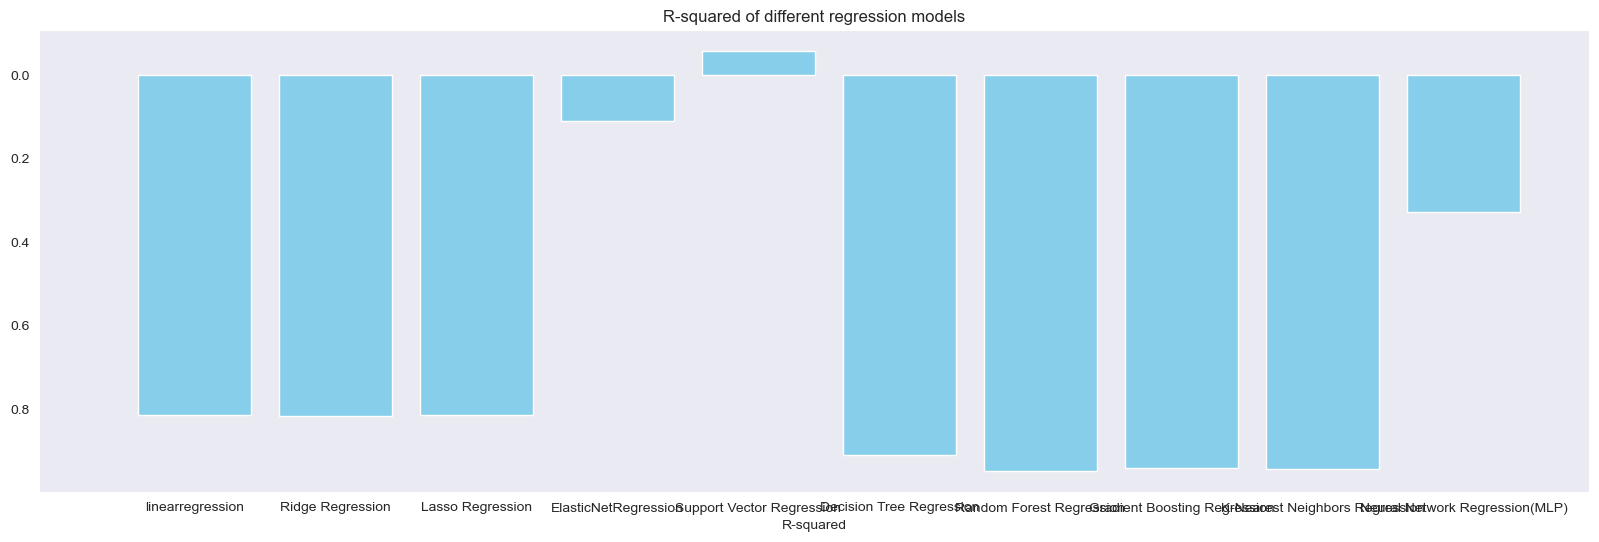

In [95]:
plt.figure(figsize=(20,6))
plt.bar(results_df['Model'], results_df['R-squared'], color='skyblue')
plt.xlabel('R-squared')
plt.title('R-squared of different regression models')
plt.xlim(-1.1)
plt.gca().invert_yaxis()
plt.show()

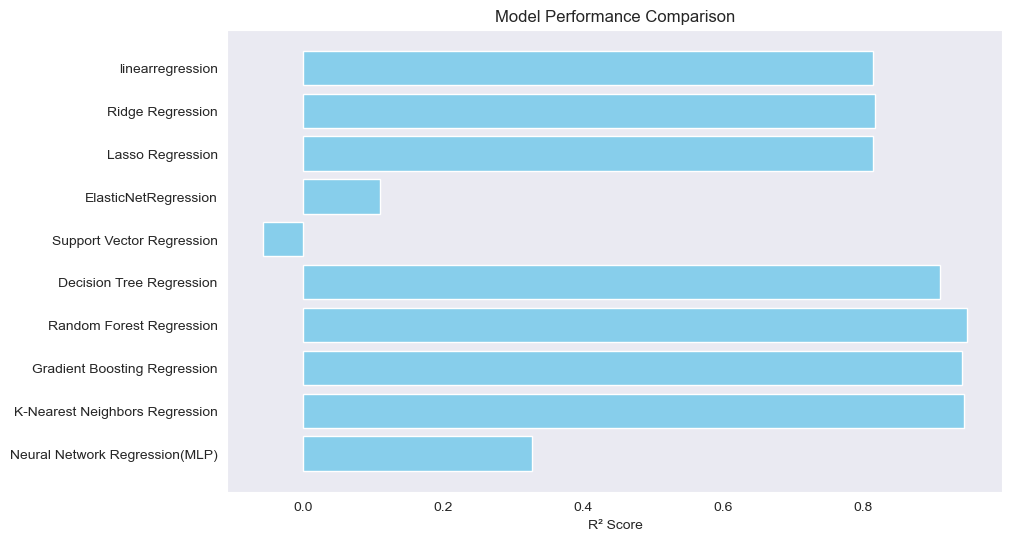

In [96]:

plt.figure(figsize=(10, 6))
plt.barh(results_df['Model'], results_df['R-squared'], color='skyblue')
plt.xlabel('R² Score')
plt.title('Model Performance Comparison')
plt.gca().invert_yaxis()
plt.show()

In [97]:
results_df = results_df.sort_values(by="R-squared", ascending=False)
print(results_df)

                            Model           MSE  R-squared
6        Random Forest Regression  4.370027e+07   0.949074
8  K-Nearest Neighbors Regression  4.783930e+07   0.944251
7    Gradient Boosting Regression  4.981627e+07   0.941947
5        Decision Tree Regression  7.666609e+07   0.910657
1                Ridge Regression  1.573343e+08   0.816651
2                Lasso Regression  1.588329e+08   0.814905
0                linearregression  1.589297e+08   0.814792
9  Neural Network Regression(MLP)  5.771681e+08   0.327399
3            ElasticNetRegression  7.636274e+08   0.110109
4       Support Vector Regression  9.072680e+08  -0.057282


In [98]:
results_dfs = results_df.sort_values(by='R-squared', ascending=False).reset_index(drop=True)

In [100]:
results_dfs

Model           MSE  R-squared
0        Random Forest Regression  4.370027e+07   0.949074
1  K-Nearest Neighbors Regression  4.783930e+07   0.944251
2    Gradient Boosting Regression  4.981627e+07   0.941947
3        Decision Tree Regression  7.666609e+07   0.910657
4                Ridge Regression  1.573343e+08   0.816651
5                Lasso Regression  1.588329e+08   0.814905
6                linearregression  1.589297e+08   0.814792
7  Neural Network Regression(MLP)  5.771681e+08   0.327399
8            ElasticNetRegression  7.636274e+08   0.110109
9       Support Vector Regression  9.072680e+08  -0.057282

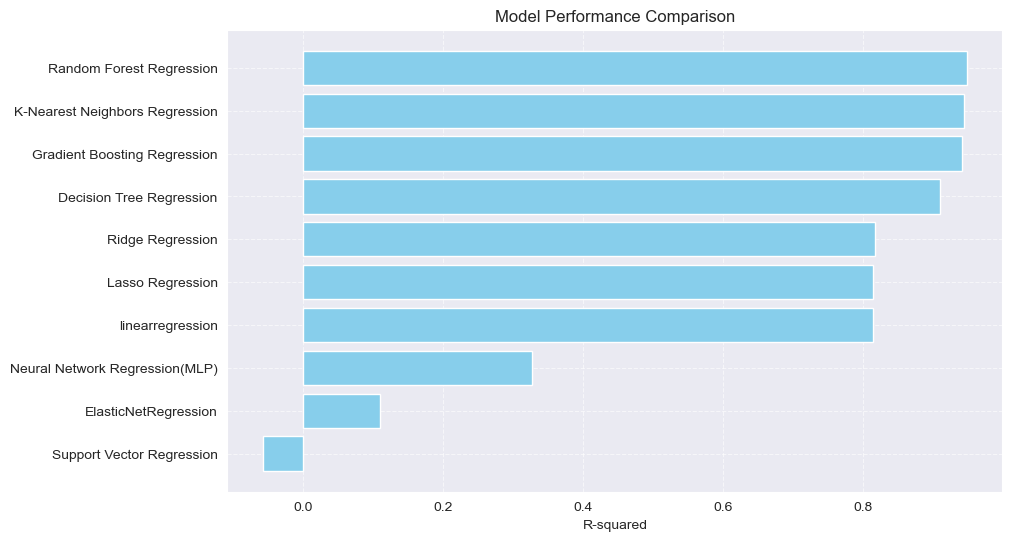

In [101]:
  plt.figure(figsize=(10, 6))
plt.barh(results_df['Model'], results_df['R-squared'], color='skyblue')
plt.xlabel('R-squared')
plt.title('Model Performance Comparison')
plt.gca().invert_yaxis()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [102]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100, 200, 500], 'max_depth': [3, 5, 10]}
grid = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid.fit(x_train, y_train)
print(grid.best_params_)

{'max_depth': 10, 'n_estimators': 100}


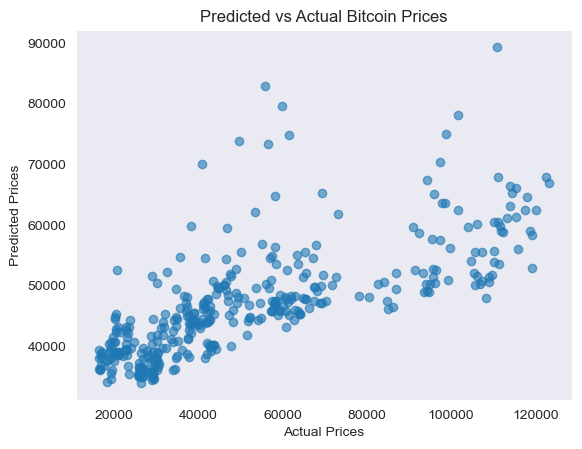

In [103]:
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual Bitcoin Prices")
plt.show()

In [104]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 18130.678514900286


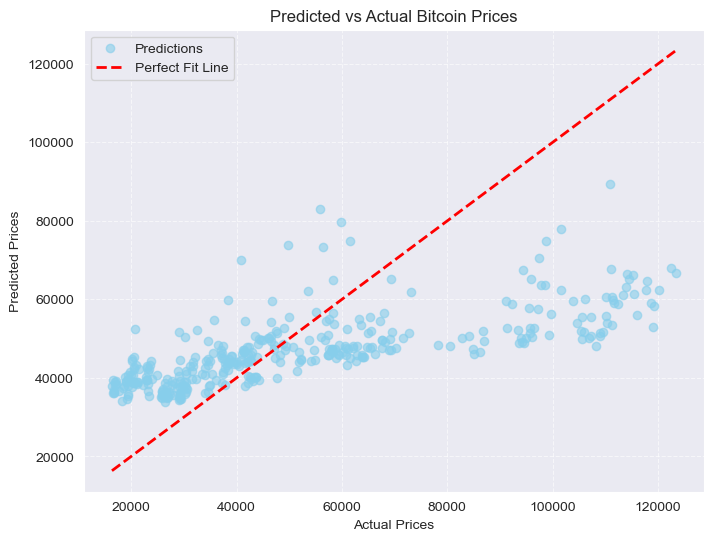

In [105]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='skyblue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Fit Line')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual Bitcoin Prices")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

{'max_depth': 10, 'n_estimators': 500}


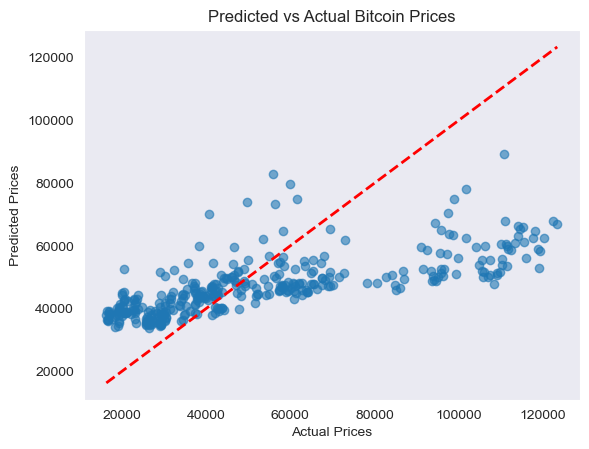

In [106]:
param_grid = {'n_estimators': [100, 200, 500], 'max_depth': [3, 5, 10]}
grid = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid.fit(x_train, y_train)
print(grid.best_params_)

plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual Bitcoin Prices")
plt.show()

In [107]:
pip install lazypredict

Note: you may need to restart the kernel to use updated packages.Collecting lazypredict
   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.9 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.9 MB 491.8 kB/s eta 0:00:17
   --- ------------------------------------ 0.8/8.9 MB 730.8 kB/s eta 0:00:12
   ---- ----------------------------------- 1.0/8.9 MB 850.9 kB/s eta 0:00:10
   ---- ----------------------------------- 1.0/8.9 MB 850.9 kB/s eta 0:00:10
   ----- ---------------------------------- 1.3/8.9 MB 854.1 kB/s eta 0:00:09
   ----- ---------------------------------- 1.3/8.9 MB 854.1 kB/s eta 0:00:09
   ------- -------------------------------- 1.6/8.9 MB 795.5 kB/s eta 0:00:10
   -------- ------------------------------- 1.8/8.9 MB 814.3 kB/s eta 0:00:09
   ---------

  You can safely remove it manually.


In [108]:
from lazypredict.Supervised import LazyClassifier

In [111]:
clf= LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(x_train, x_test, y_train, y_test)

  0%|          | 0/32 [00:00<?, ?it/s]

In [115]:
display(models)

Empty DataFrame
Columns: [Accuracy, Balanced Accuracy, ROC AUC, F1 Score, Time Taken]
Index: []

In [114]:
predictions

Empty DataFrame
Columns: [Accuracy, Balanced Accuracy, ROC AUC, F1 Score, Time Taken]
Index: []

In [116]:
print(y_train.unique())
print(y_test.unique())

[105641.7578125   60274.5        100043.         ... 103998.5703125
  29799.08007812  20336.84375   ]
[ 22777.625       21161.51953125  58870.89453125  48199.953125
  29248.48828125  27817.5         61004.40625    111200.5859375
  41143.9296875   18732.12109375  16908.23632812 108231.1796875
  99299.1953125   34616.06640625  26804.99023438  58009.2265625
  41441.1640625   40782.73828125  29675.73242188 103960.171875
  20632.41015625  44963.07421875  19955.44335938  30314.33398438
  41626.1953125   19345.12109375  20877.55273438  29282.9140625
  34732.32421875  65635.3046875  101663.1875     114056.0859375
  20599.53710938  92343.7890625   21085.87695312  37849.6640625
  66278.3671875   63891.47265625  98768.53125    110807.8828125
  54841.56640625  51826.6953125   49716.19140625  51938.5546875
  41545.78515625  29178.6796875   30296.953125    82718.5
  28904.62304688  19191.63085938  42742.65234375  42520.40234375
  60793.7109375   64828.65625     28411.03515625  57484.7890625
  16717.

In [117]:
x_train.isnull().sum().sum()

AttributeError: 'numpy.ndarray' object has no attribute 'isnull'

In [118]:
x_train = x_train.to_pandas()
x_test = x_test.to_pandas()
y_train = y_train.to_pandas()
y_test = y_test.to_pandas()

AttributeError: 'numpy.ndarray' object has no attribute 'to_pandas'

In [119]:
print(x_train.shape)
print(y_train.shape)
print(y_train.unique())

(1460, 4)
(1460,)
[105641.7578125   60274.5        100043.         ... 103998.5703125
  29799.08007812  20336.84375   ]
